In [1]:
import os  
import time  
from sklearn import metrics  
import numpy as np  
import scipy.io as sio  
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from pyecharts.charts import Parallel
from pandas.plotting import parallel_coordinates
import plotly as py
import plotly.graph_objs as go
from sklearn.multiclass import OneVsRestClassifier
import scipy.stats

In [2]:
data = pd.DataFrame(pd.read_excel(r'D:\材料文献\韩晓丽（材料）\材料数据\油浸式变压器数据.xls', 'Sheet3'))
print(data.shape)
print(data)

(324, 6)
         H2      CH4    C2H2    C2H4    C2H6  Faulttype
0     82.40  1548.20    0.00  320.90  403.80          4
1     19.24   110.00    0.33    3.38  181.08          4
2     19.19   187.55    1.00   74.43  329.49          4
3     20.88   212.29    0.92   73.06  324.05          4
4     78.00    70.10   12.20  635.80  294.80          4
..      ...      ...     ...     ...     ...        ...
319  133.00     1.00   18.20    6.60    2.00          2
320    0.40     0.10    5.20    0.70    0.20          2
321  190.00    28.50  773.00   95.70    3.10          2
322    5.70     2.40    3.00    2.70    0.20          2
323  100.00    50.00   50.00   40.00    0.10          2

[324 rows x 6 columns]


In [3]:
# 目标变量
y = data.Faulttype
# 列出特征
feature_names = ['H2','CH4','C2H6','C2H4','C2H2']
X = data[feature_names]
print(data['Faulttype'].value_counts())
print(data.max())
print(data.min())

4    166
2     97
0     25
3     21
1     15
Name: Faulttype, dtype: int64
H2            8300.0
CH4           7500.0
C2H2          3756.5
C2H4         19370.0
C2H6          5120.0
Faulttype        4.0
dtype: float64
H2           0.40
CH4          0.10
C2H2         0.00
C2H4         0.09
C2H6         0.00
Faulttype    0.00
dtype: float64


In [4]:
# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#归一化
min_max_scaler = MinMaxScaler()  
 
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
print( y_test.value_counts())
train, test = train_test_split(data, test_size=0.3, random_state=0)


4    48
2    32
0     9
3     5
1     4
Name: Faulttype, dtype: int64


0.826530612244898
The confusion matrix result:
 [[ 6  0  0  1  1]
 [ 0  4  1  0  2]
 [ 1  0 30  2  4]
 [ 0  0  1  0  0]
 [ 2  0  0  2 41]]


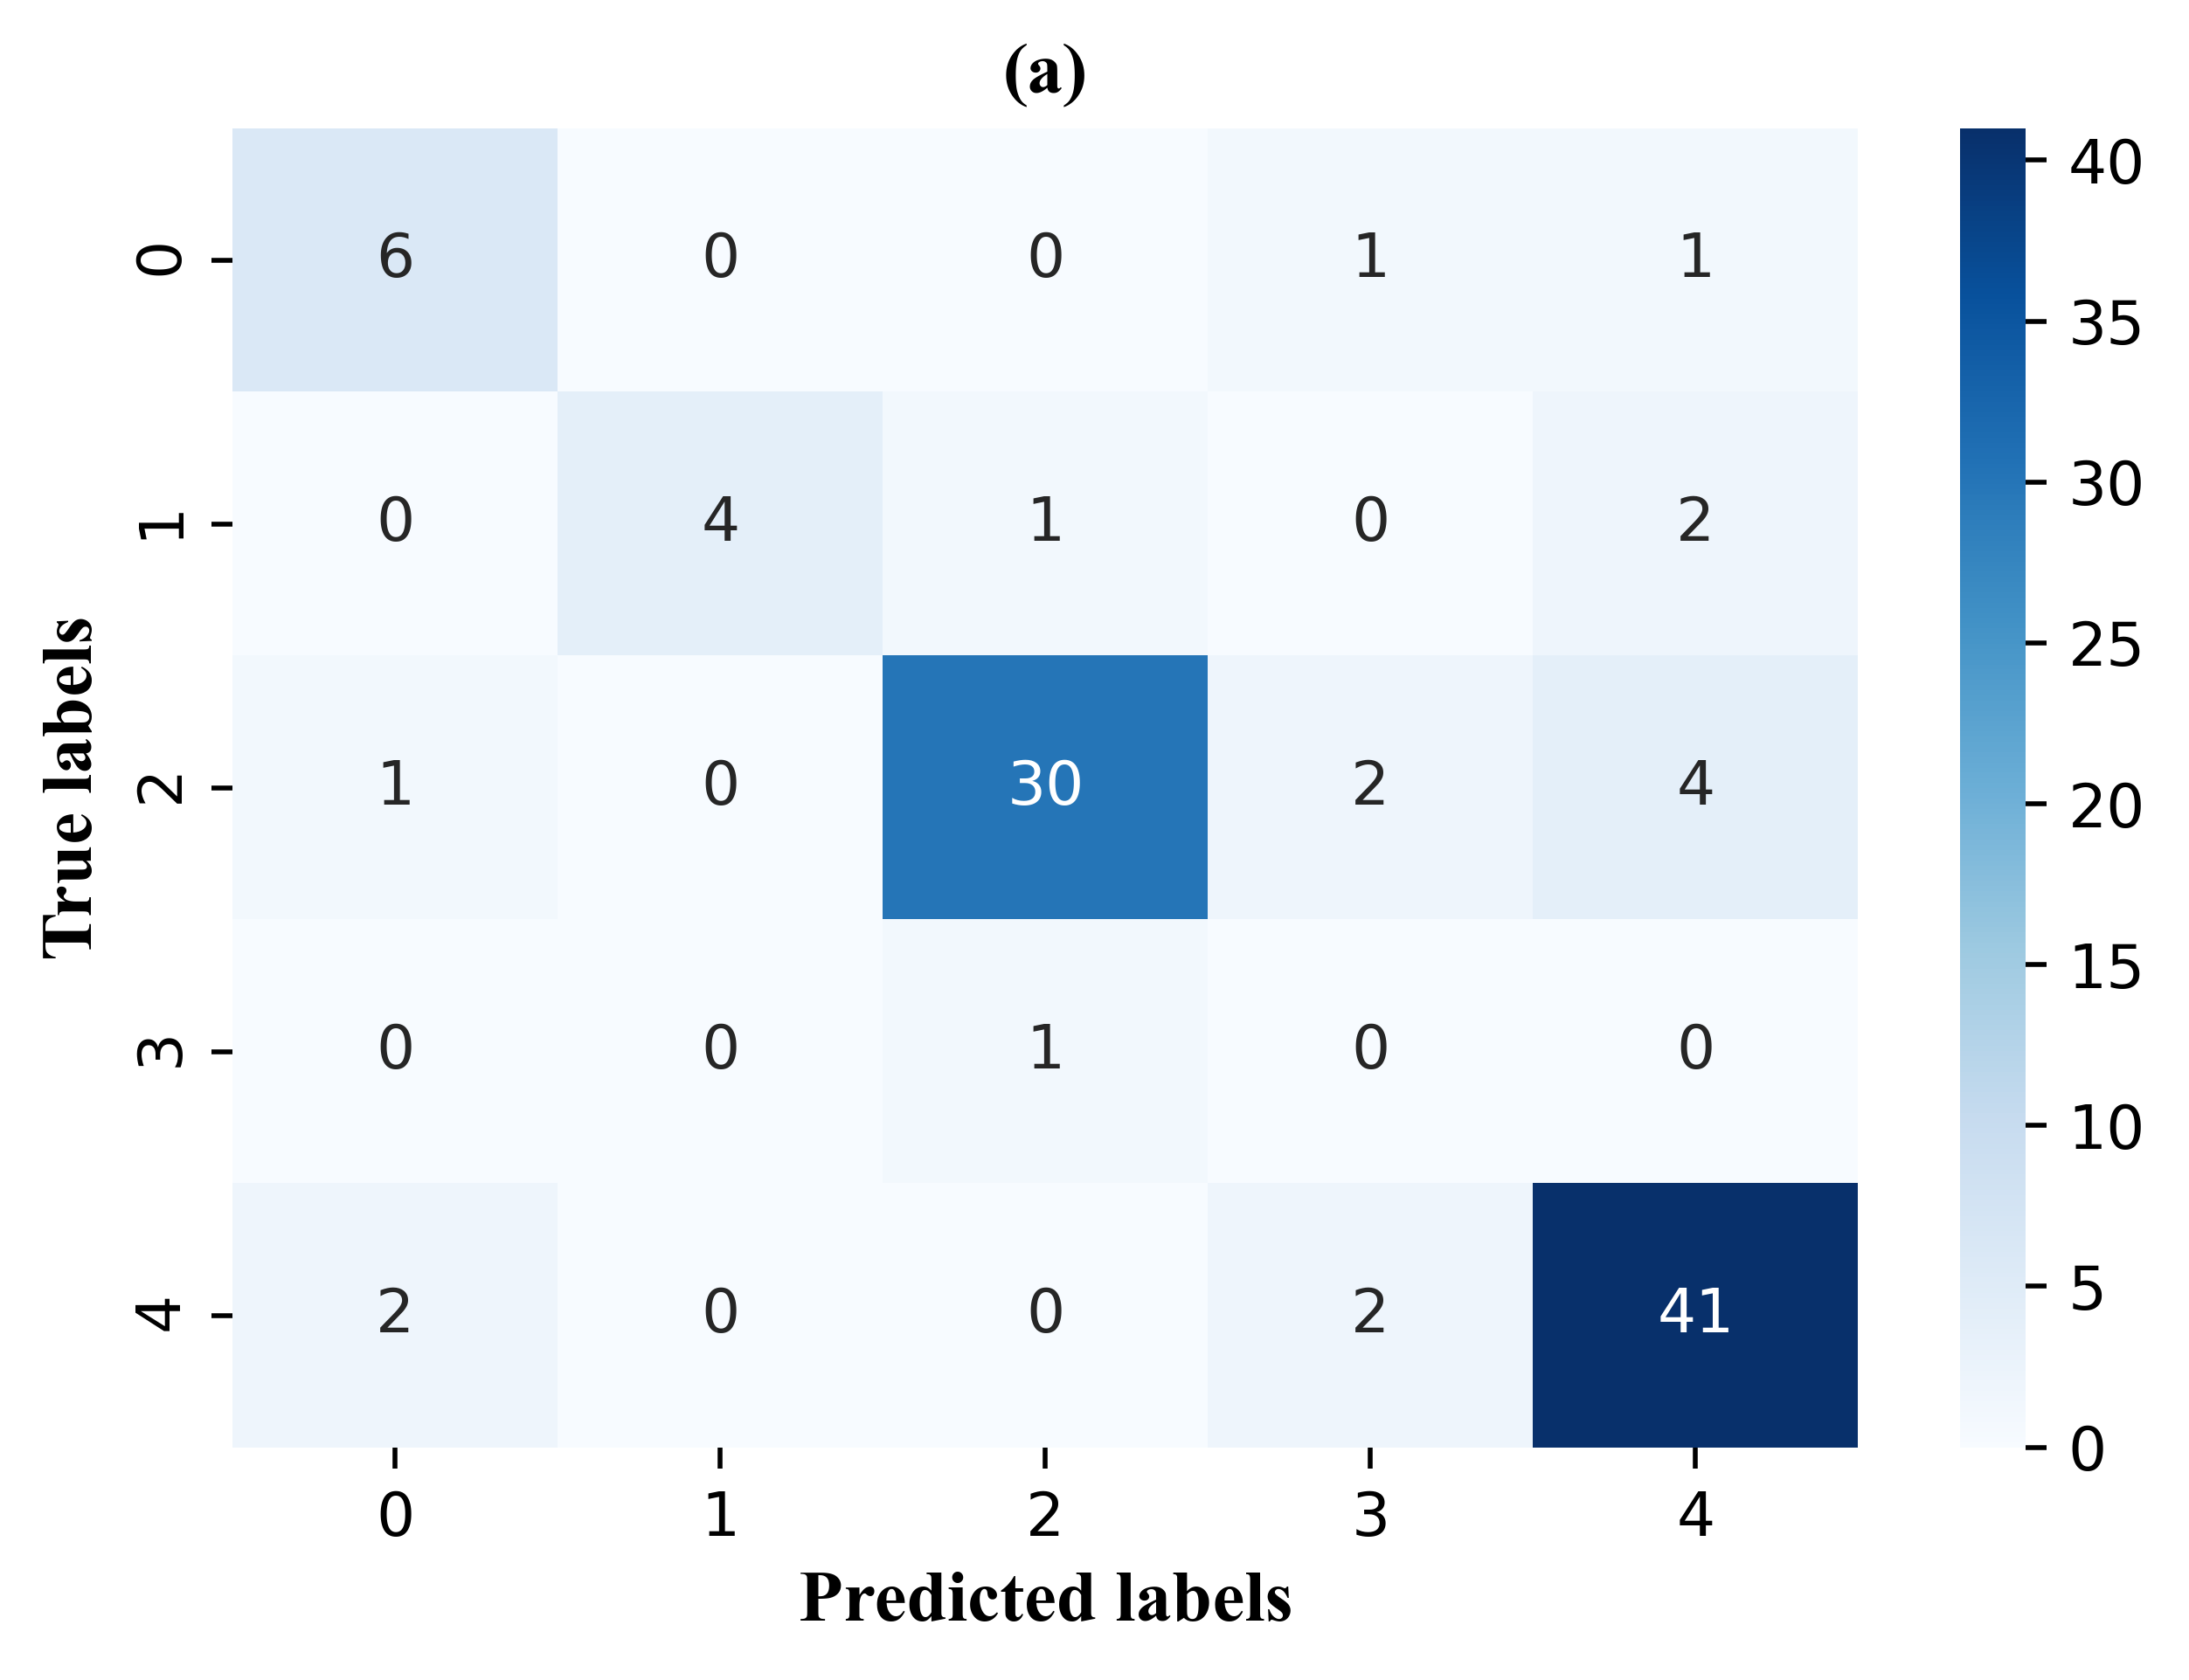



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.75       0.57142857 0.81081081 0.         0.91111111]
recall_score_average_micro =  0.826530612244898
recall_score_average_macro =  0.6086700986700986
recall_score_average_weighted =  0.826530612244898


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.70588235 0.72727273 0.86956522 0.         0.88172043]
f1_score_average_micro =  0.826530612244898
f1_score_average_macro =  0.636888145542547
f1_score_average_weighted =  0.842747962375056


In [5]:
#模型训练KNN
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)
y_pre1 = clf_KNN.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pre1) 
print(accuracy)

#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre1,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化

plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(a)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre1,y_test, average=None)
recall_score_average_micro = recall_score(y_pre1,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre1,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre1,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)

print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre1,y_test, average=None)
f1_score_average_micro = f1_score(y_pre1,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre1,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre1,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


0.8979591836734694
The confusion matrix result:
 [[ 5  0  0  0  2]
 [ 0  4  0  0  0]
 [ 3  0 31  2  1]
 [ 0  0  1  3  0]
 [ 1  0  0  0 45]]


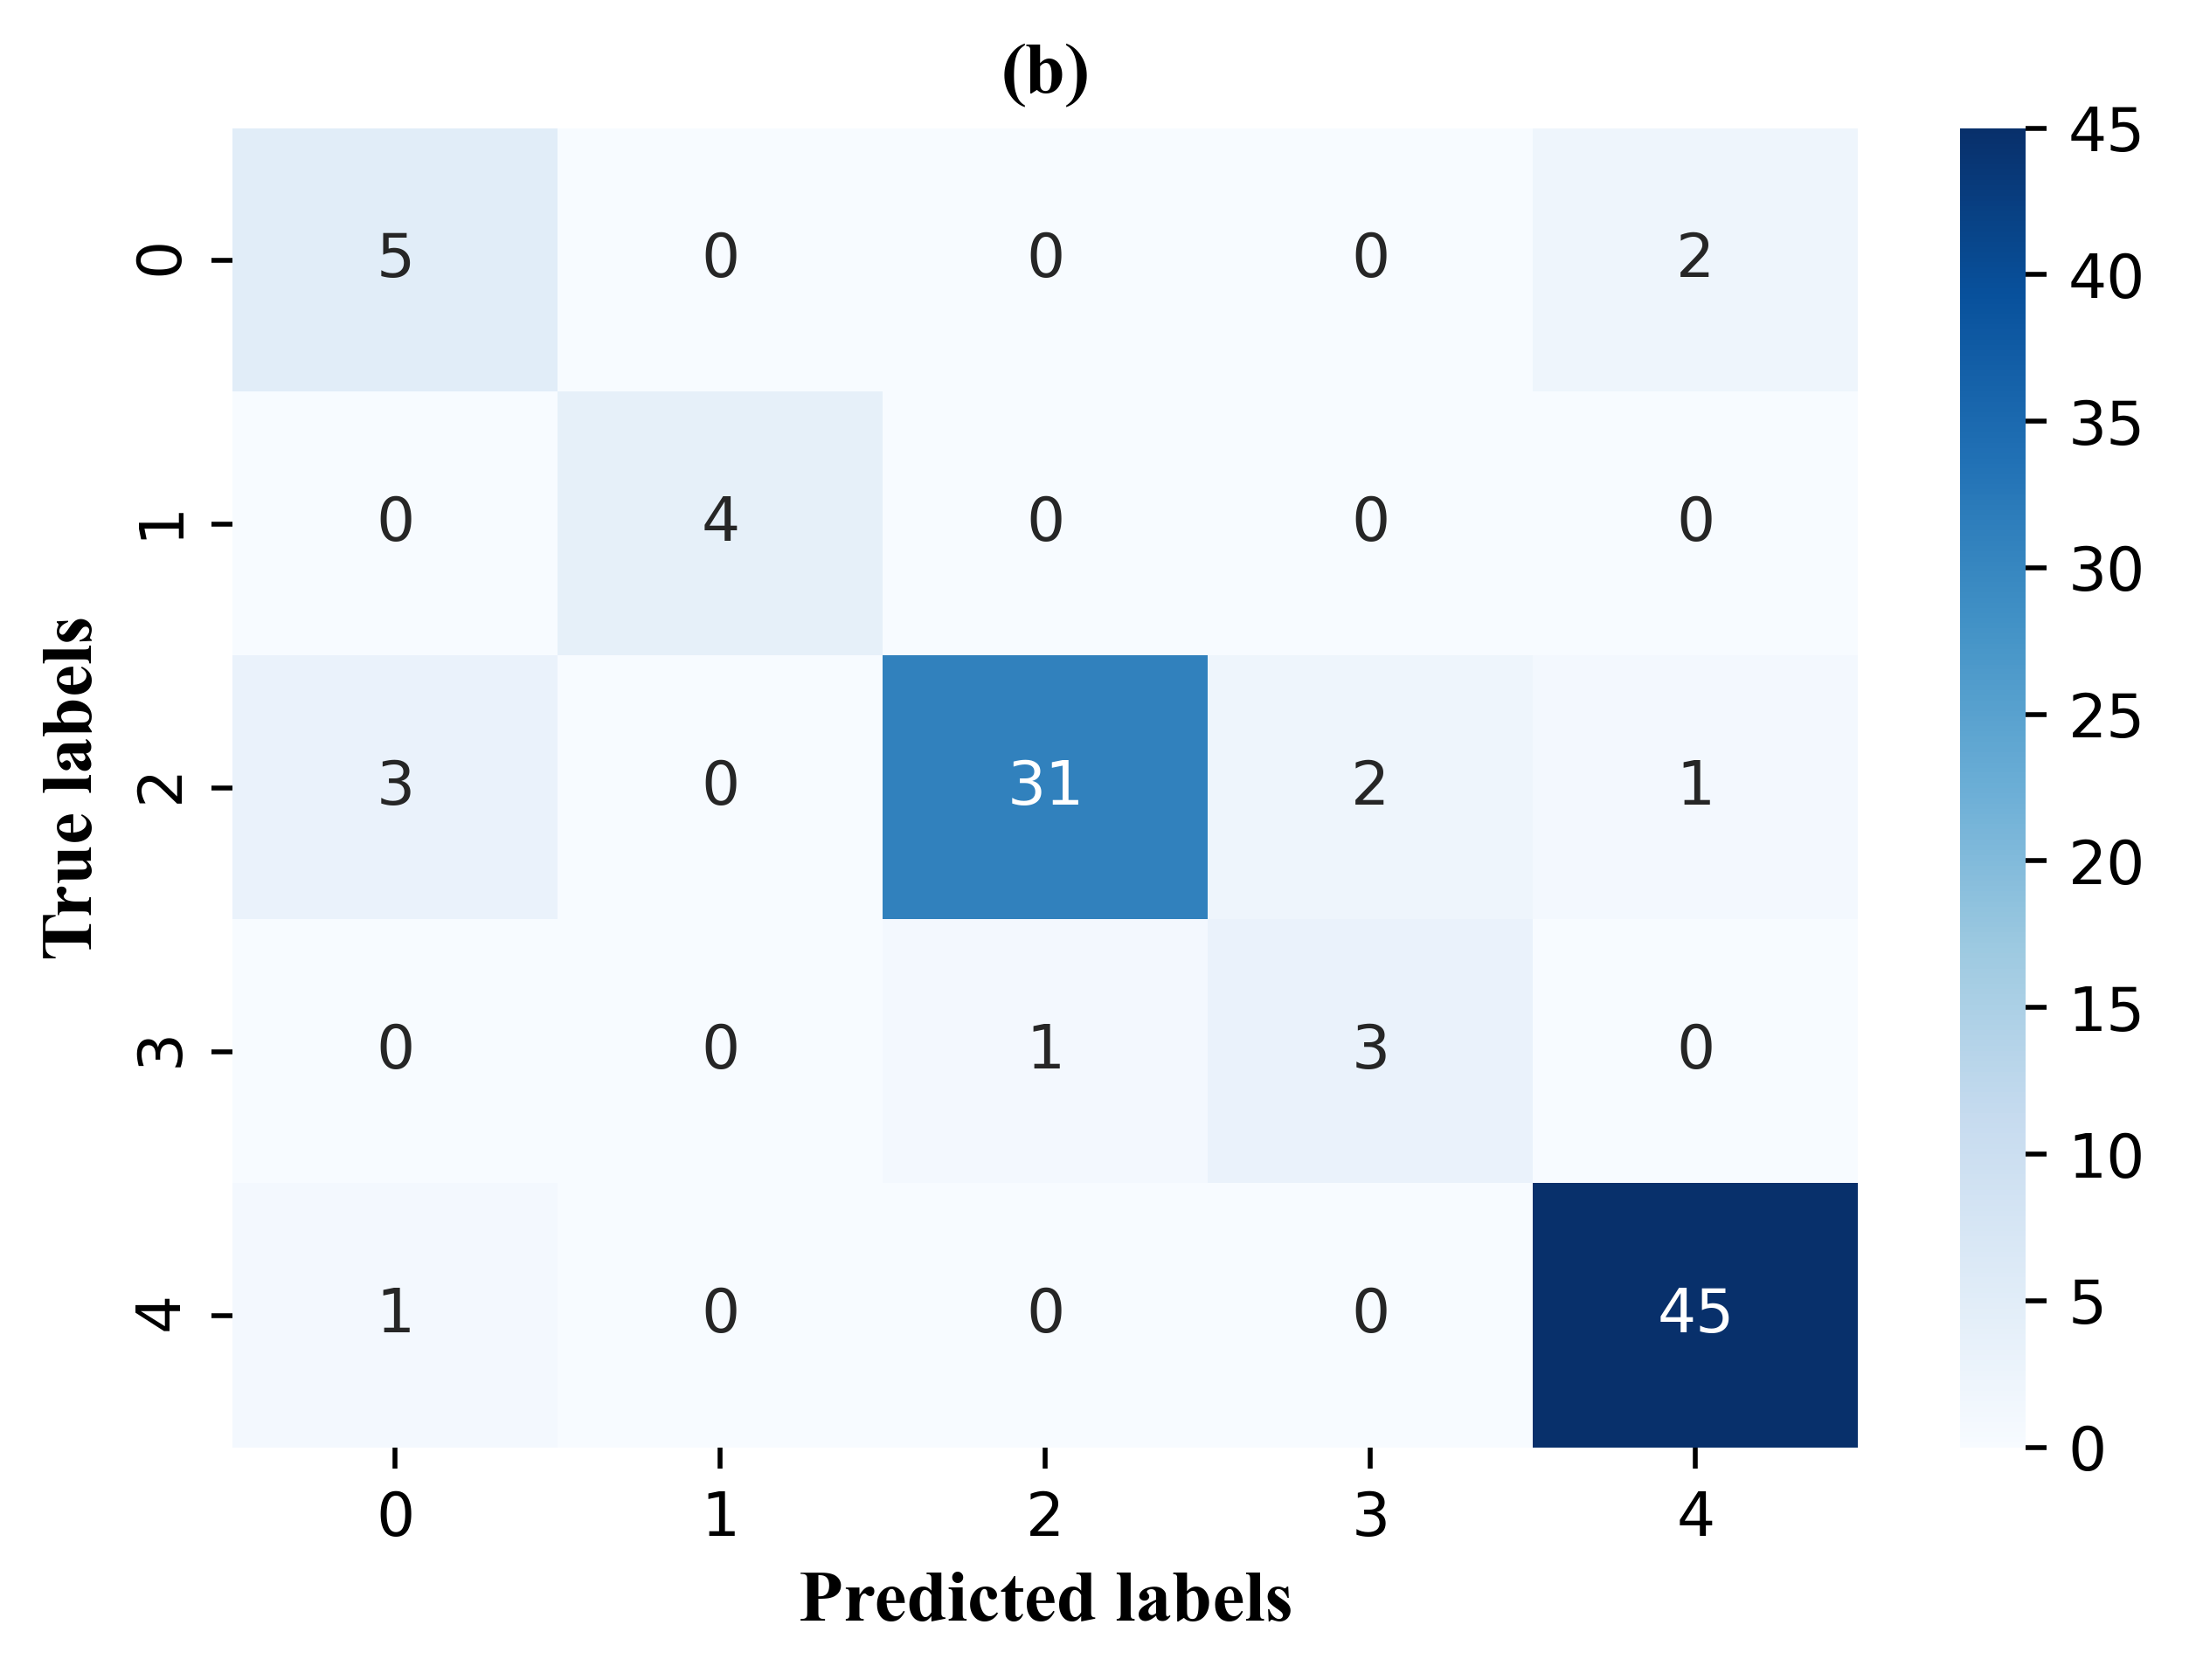



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.71428571 1.         0.83783784 0.75       0.97826087]
recall_score_average_micro =  0.8979591836734694
recall_score_average_macro =  0.856076884337754
recall_score_average_weighted =  0.8979591836734694


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.625      1.         0.89855072 0.66666667 0.95744681]
f1_score_average_micro =  0.8979591836734694
f1_score_average_macro =  0.8295328399629971
f1_score_average_weighted =  0.901332619079084


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
y_pre2 = clf_gb.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pre2) 
print(accuracy)
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre2,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(b)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre2,y_test, average=None)
recall_score_average_micro = recall_score(y_pre2,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre2,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre2,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)

print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre2,y_test, average=None)
f1_score_average_micro = f1_score(y_pre2,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre2,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre2,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


0.8877551020408163
The confusion matrix result:
 [[ 5  0  0  0  2]
 [ 0  4  0  0  0]
 [ 3  0 32  3  1]
 [ 0  0  0  1  0]
 [ 1  0  0  1 45]]


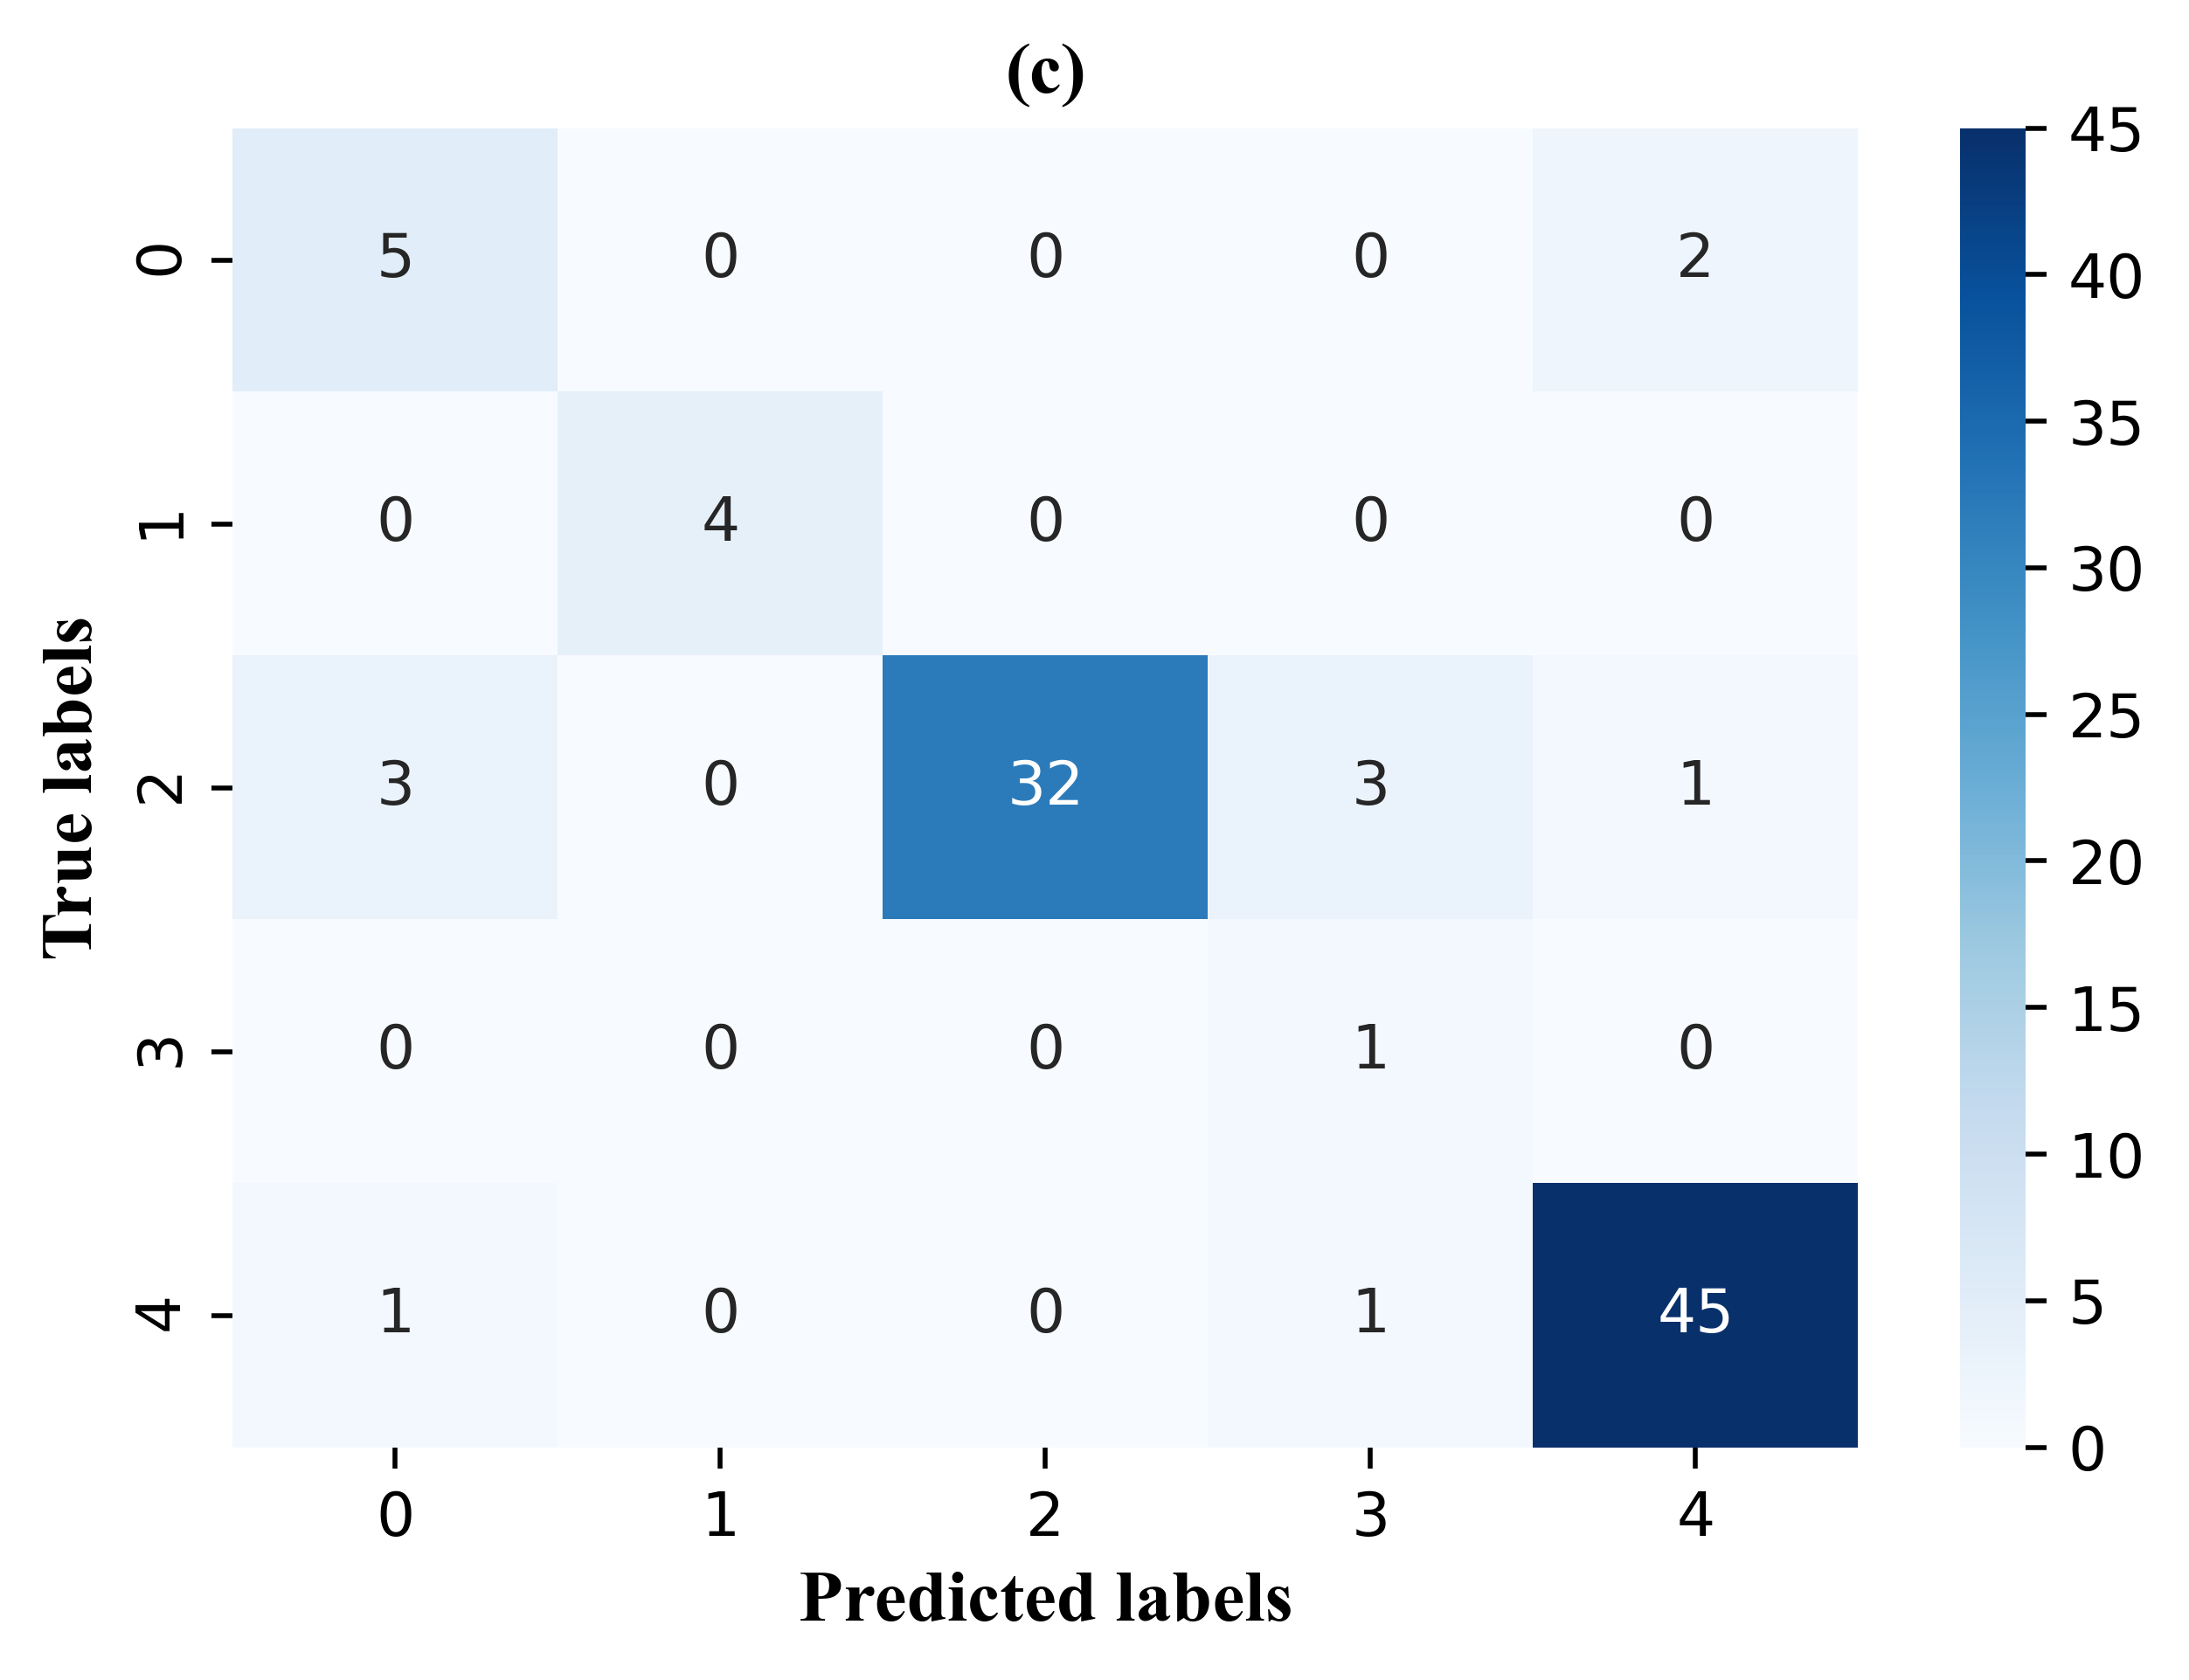



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.71428571 1.         0.82051282 1.         0.95744681]
recall_score_average_micro =  0.8877551020408163
recall_score_average_macro =  0.8984490686618345
recall_score_average_weighted =  0.8877551020408163


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.625      1.         0.90140845 0.33333333 0.94736842]
f1_score_average_micro =  0.8877551020408163
f1_score_average_macro =  0.7614220410180381
f1_score_average_weighted =  0.9019344765333859


In [7]:
from sklearn.ensemble import RandomForestClassifier  
clf =  OneVsRestClassifier(RandomForestClassifier(max_depth=4,criterion='gini', random_state=39))
clf.fit(X_train, y_train)
y_pre3 = clf.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pre3) 
print(accuracy)
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre3,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(c)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre3,y_test, average=None)
recall_score_average_micro = recall_score(y_pre3,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre3,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre3,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)

print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre3,y_test, average=None)
f1_score_average_micro = f1_score(y_pre3,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre3,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre3,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


0.8469387755102041
The confusion matrix result:
 [[ 7  0  0  1  6]
 [ 0  4  1  1  0]
 [ 1  0 30  0  1]
 [ 0  0  1  3  2]
 [ 1  0  0  0 39]]


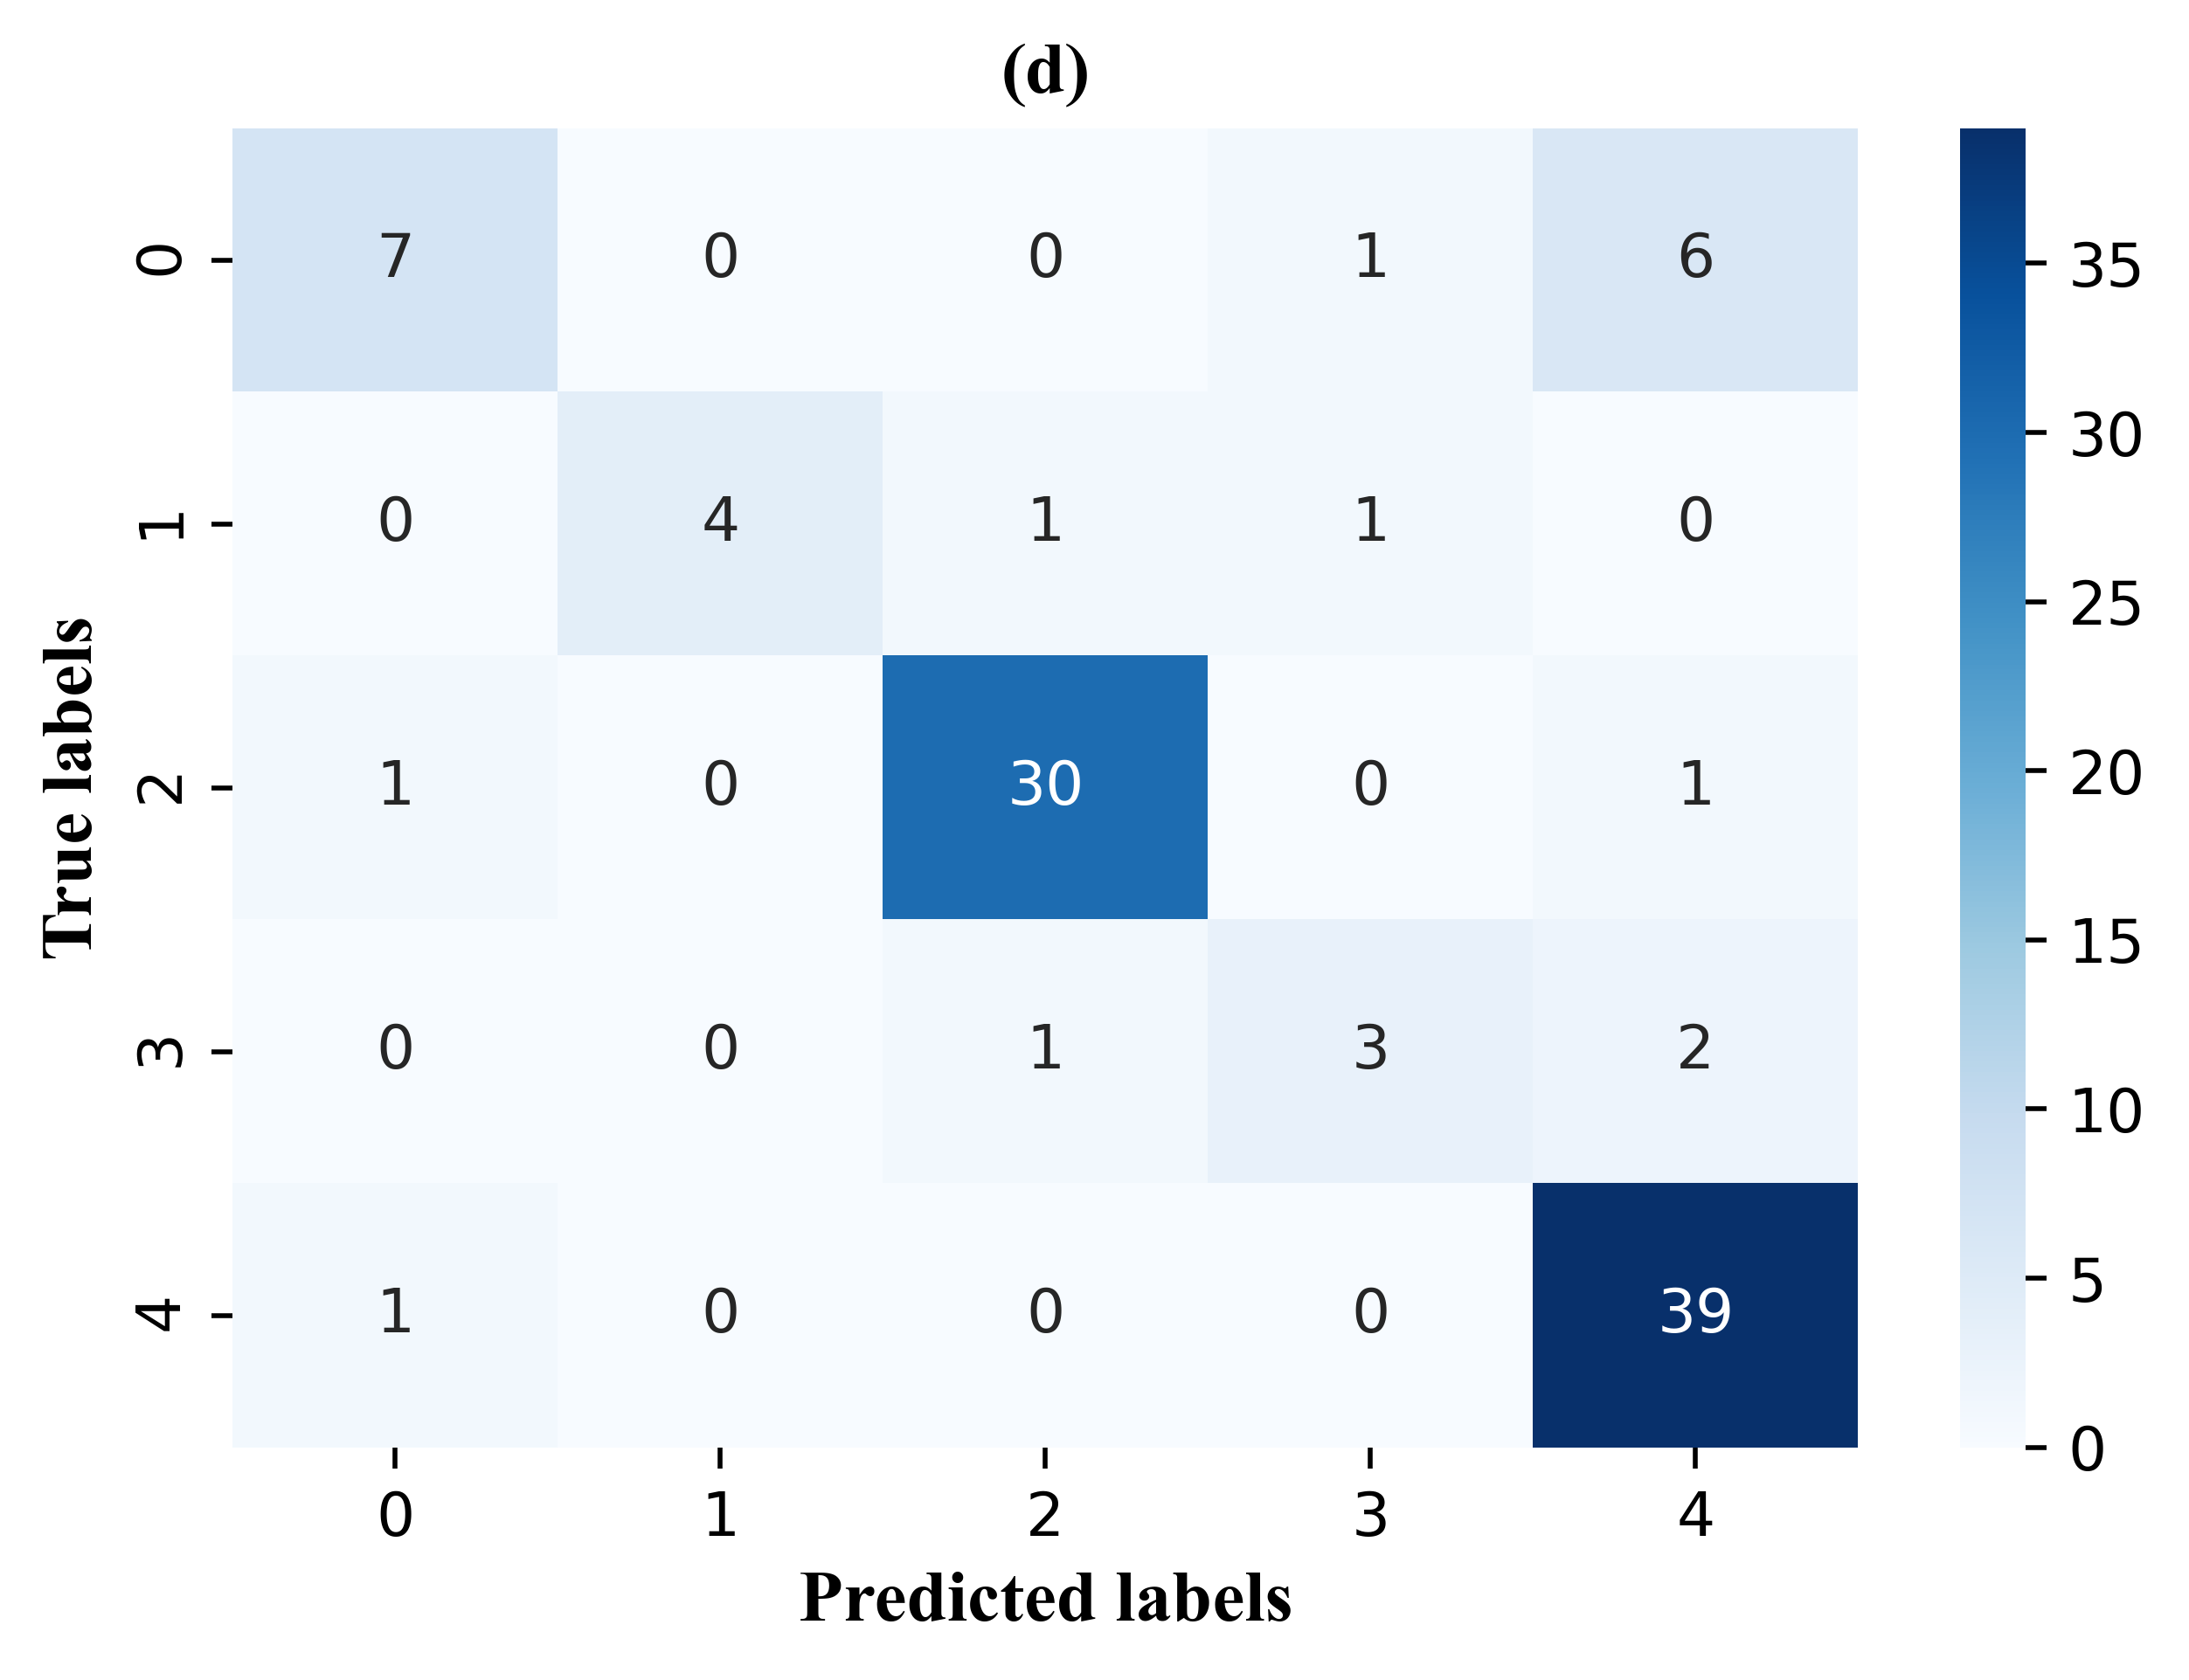



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.5        0.66666667 0.9375     0.5        0.975     ]
recall_score_average_micro =  0.8469387755102041
recall_score_average_macro =  0.7158333333333333
recall_score_average_weighted =  0.8469387755102041


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.60869565 0.8        0.9375     0.54545455 0.88636364]
f1_score_average_micro =  0.8469387755102041
f1_score_average_macro =  0.7556027667984189
f1_score_average_weighted =  0.8372348148745664


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## 调用决策树模型
clf_tree = DecisionTreeClassifier(criterion='gini',splitter="best",random_state=32)

## 用决策树模型拟合构造的数据集
clf_tree.fit(X_train,y_train)
y_pre4 = clf_tree.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pre4) 
print(accuracy)
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre4,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(d)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre4,y_test, average=None)
recall_score_average_micro = recall_score(y_pre4,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre4,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre4,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre4,y_test, average=None)
f1_score_average_micro = f1_score(y_pre4,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre4,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre4,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


0.6836734693877551
The confusion matrix result:
 [[ 0  0  0  0  0]
 [ 0  3  0  0  1]
 [ 0  1 18  0  1]
 [ 0  0  0  0  0]
 [ 9  0 14  5 46]]


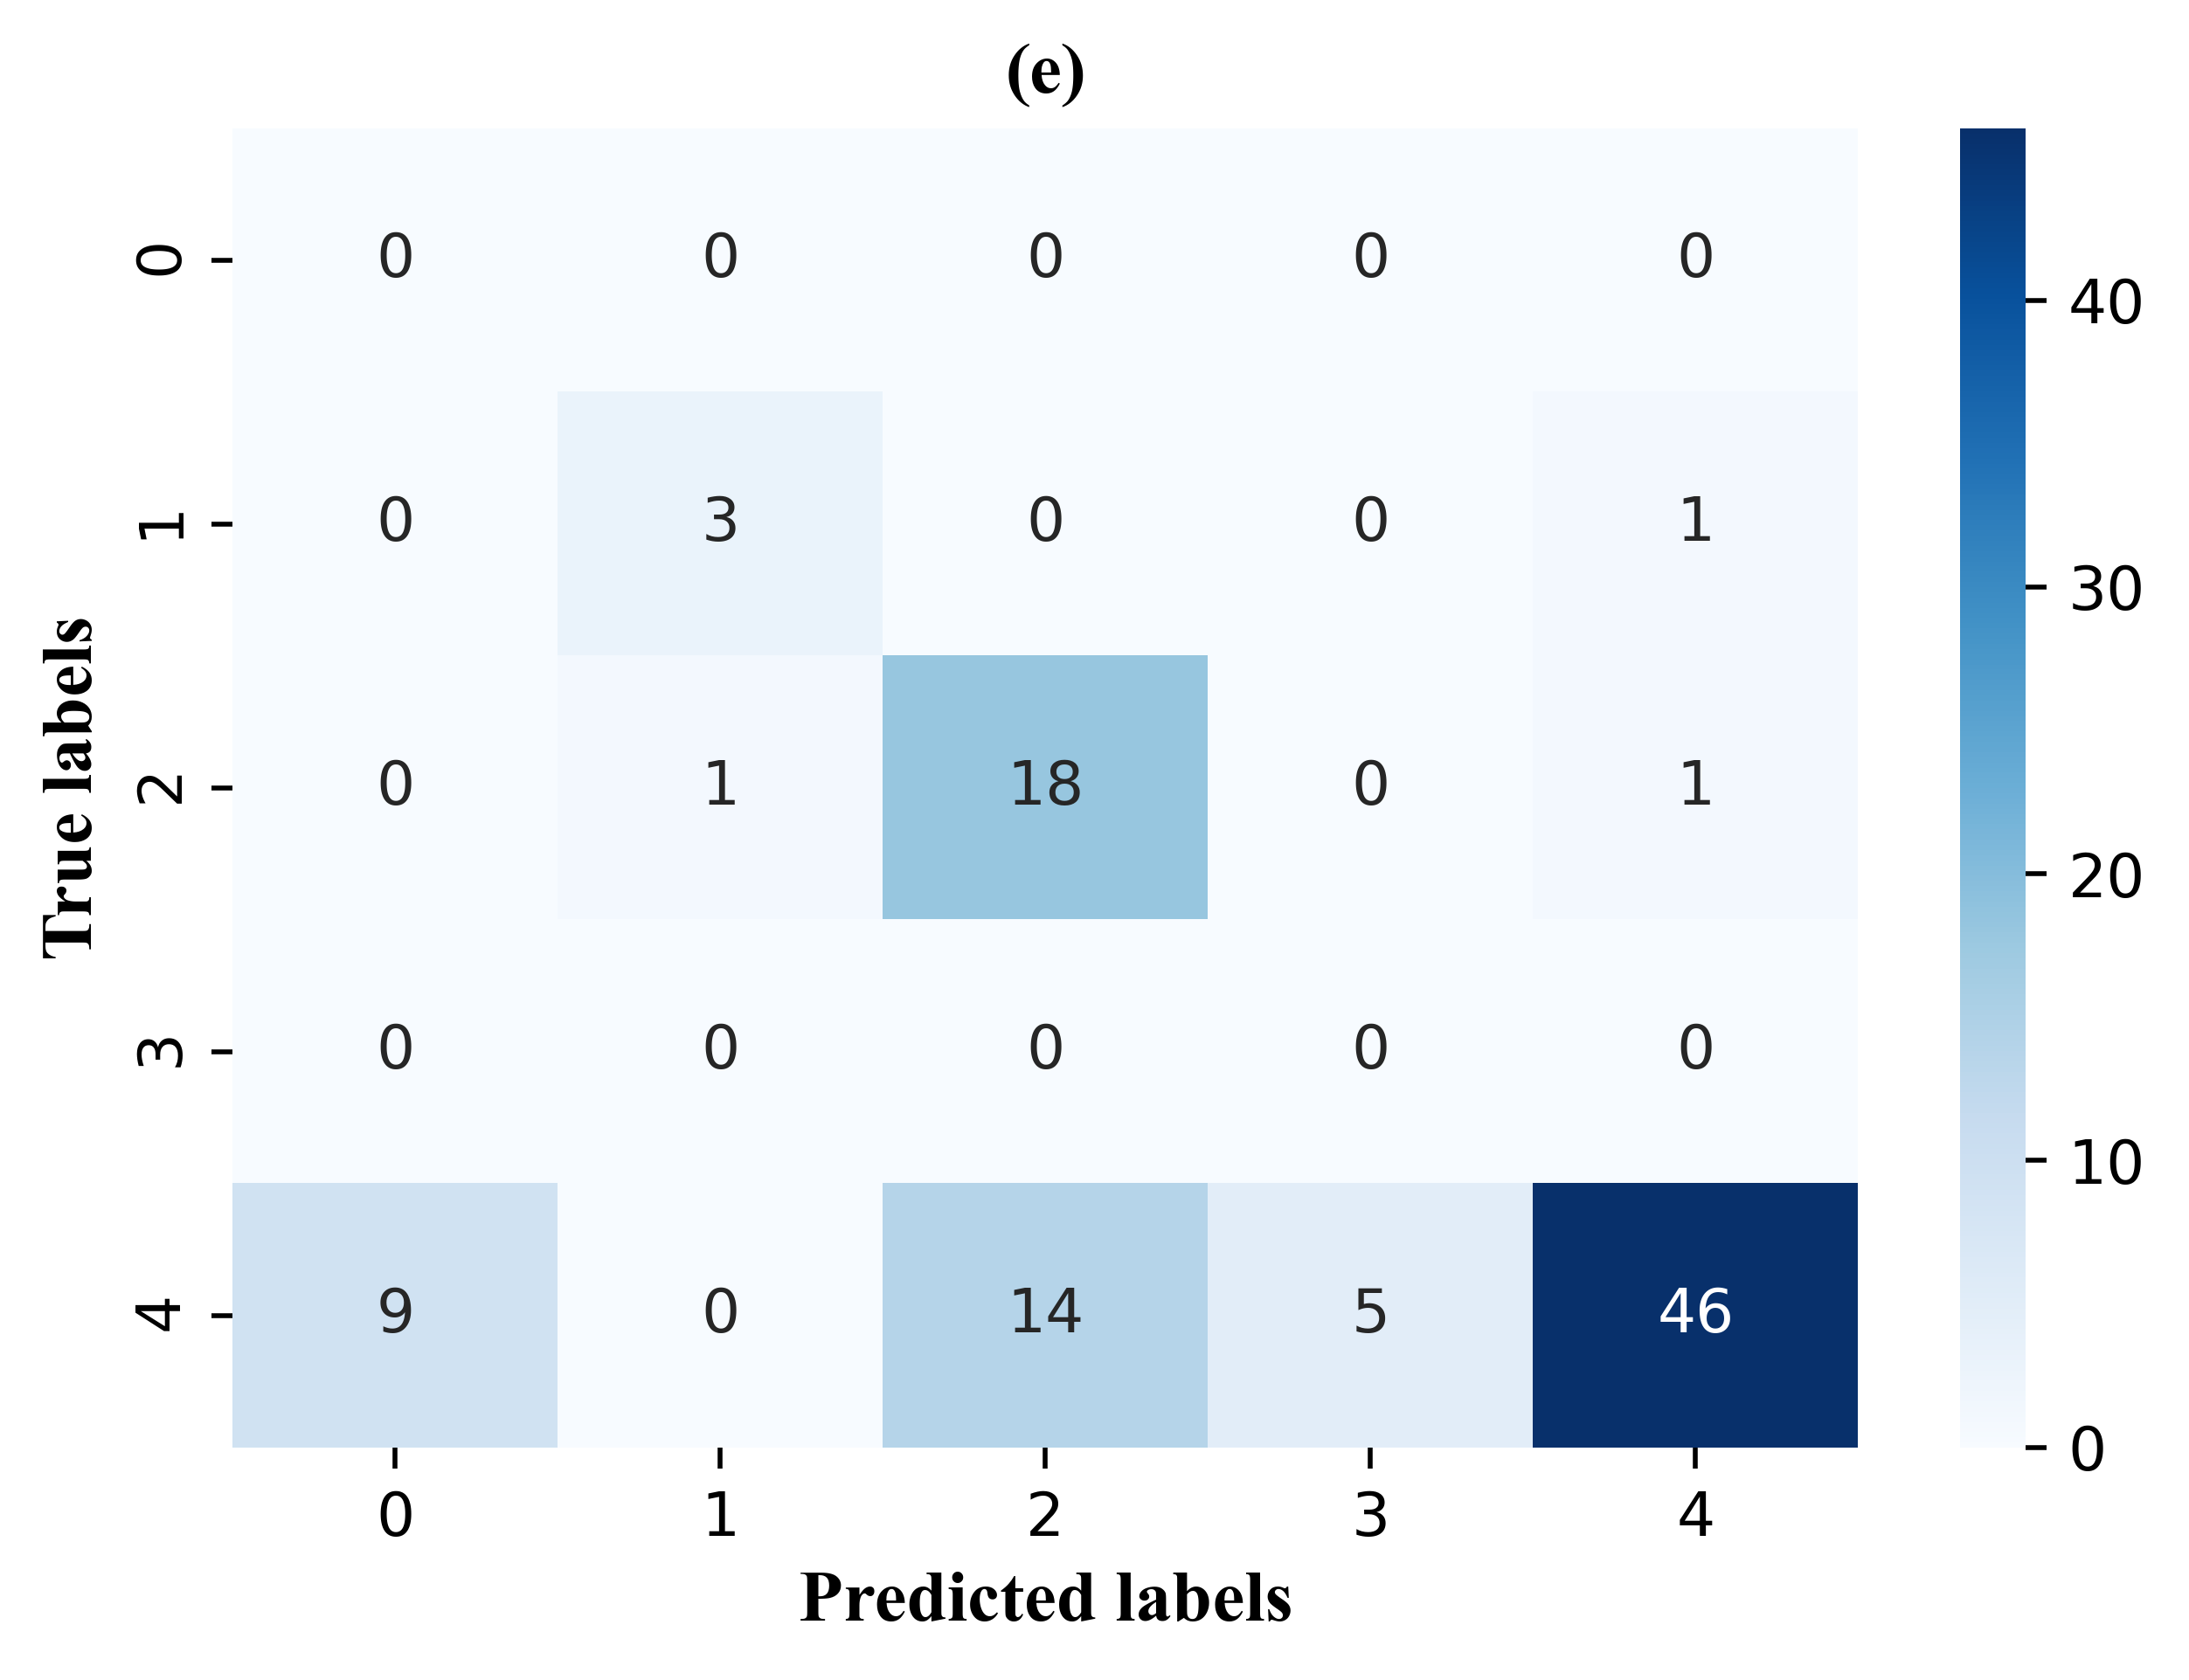



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.         0.75       0.9        0.         0.62162162]
recall_score_average_micro =  0.6836734693877551
recall_score_average_macro =  0.4543243243243243
recall_score_average_weighted =  0.6836734693877551


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.         0.75       0.69230769 0.         0.75409836]
f1_score_average_micro =  0.6836734693877551
f1_score_average_macro =  0.43928121059268593
f1_score_average_weighted =  0.7413207401497799


In [10]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC  
clf = SVC(probability=True,random_state=42) 
clf.fit(X_train, y_train)
y_pre5 = clf.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pre5) 
print(accuracy)
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre5,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(e)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre5,y_test, average=None)
recall_score_average_micro = recall_score(y_pre5,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre5,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre5,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre5,y_test, average=None)
f1_score_average_micro = f1_score(y_pre5,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre5,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre5,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


In [11]:
# KNN Classifier  
def knn_classifier(X_train, y_train):  
    from sklearn.neighbors import KNeighborsClassifier  
    clf = KNeighborsClassifier()  
    clf.fit(X_train, y_train)
    return clf  
  

# GradientBoostingClassifier  
def gradient_boosting_classifier (X_train, y_train):  
    from sklearn.ensemble import GradientBoostingClassifier 
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    return clf  


# Random Forest Classifier  
def random_forest_classifier(X_train, y_train):  
    from sklearn.ensemble import RandomForestClassifier  
    clf =  OneVsRestClassifier(RandomForestClassifier(max_depth=4,criterion='gini', random_state=39))
    clf.fit(X_train, y_train)
    return clf  


# Decision Tree Classifier  
def decision_tree_classifier(X_train, y_train):  
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree  
    clf = DecisionTreeClassifier(criterion='gini',splitter="best",random_state=32)
    clf.fit(X_train, y_train)
    return clf  
  

# SVM Classifier  
def svm_classifier(X_train, y_train):  
    from sklearn.svm import SVC  
    clf = SVC(probability=True,random_state=42) 
    clf.fit(X_train, y_train)
    return clf   


if __name__ == '__main__':
    clf_save_file = None
    clf_save = {}
    grid_num = 463
    grid_train_sample = 347
    grid_test_sample = 116
    test_classifiers = [ 'KNN', 'GB', 'RF', 'DT','SVM']  
    classifiers = {#'NB':naive_bayes_classifier,
                  'KNN':knn_classifier,  
                   'GB':gradient_boosting_classifier ,  
                   'RF':random_forest_classifier,  
                   'DT':decision_tree_classifier,  
                  'SVM':svm_classifier,
               
    }  
      
    print ('reading training and testing data...') 
    num_train, num_feat_tomek = X_train.shape 
    num_test, num_feat = X_test.shape  
    is_binary_class = (len(np.unique(y_train)) == 463)  
    print ('******************** Data Info *********************')  
    print (' #training data: %d #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat))
predict_total2=[]
rmse_total=[]
predict_proba2=[]
for classifier in test_classifiers:  
    print ('******************* %s ********************' % classifier)
    start_time = time.time()  
    clf = classifiers[classifier](X_train, y_train) 
    print ('training took %fs!' % (time.time() - start_time)  )
    predict = clf.predict(X_test)
    predict_proba = clf.predict_proba(X_test)
    if clf_save_file != None:  
        clf_save[classifier] = clf  
    if is_binary_class:  
        precision = metrics.precision_score(y_test, predict, average='micro')  
        recall = metrics.recall_score(y_test, predict, average='micro')
        tmp = func_rmse(predict,y_test)
        rmse_total.append(tmp)
        print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))  
    accuracy = sklearn.metrics.accuracy_score(y_test, predict)  
    print ('accuracy: %.2f%%' % (100 * accuracy) ) 
    print(classification_report(y_test, predict))
    predict_total2.append(predict)
    predict_proba2.append(predict_proba)
predict_total1 = np.array(predict_total2)
predict_total = predict_total1.transpose()
predict_proba1 = np.array(predict_proba2)
predict_proba = predict_proba1.transpose()
print(predict_total)
print(predict_total.shape)

print(predict_proba)
print(predict_proba.shape)

reading training and testing data...
******************** Data Info *********************
 #training data: 226 #testing_data: 98, dimension: 5
******************* KNN ********************
training took 0.000946s!
accuracy: 82.65%
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.57      1.00      0.73         4
           2       0.81      0.94      0.87        32
           3       0.00      0.00      0.00         5
           4       0.91      0.85      0.88        48

    accuracy                           0.83        98
   macro avg       0.61      0.69      0.64        98
weighted avg       0.80      0.83      0.81        98

******************* GB ********************
training took 0.265975s!
accuracy: 89.80%
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       1.00      1.00      1.00         4
           2       0.84      0.9

In [12]:
import numpy as np
 
 
def py_intersect(string_1, string_2):
    """
    :param string_1: 字符串
    :param string_2: 字符串
    :return: 两字符串的交集
    """
    result = ''
    for char in string_1:
        if char in string_2 and char not in result:
            result += char
    return result
 
 
def dempster(mp1, mp2, P):
    """
    :param mp1: 证据源1，numpy数组，存储信度
    :param mp2: 证据源2，numpy数组，存储信度
    :param P: 辨识框架
    :return: 返回融合信度和冲突因子
    """
    l = len(P)  # 幂集长度，这里指恐怖分子数目
    mp = np.zeros((1, l), 'float64')  # 初始化最终结果mp
    k_matrix = np.zeros((l, l))  # 冲突因子乘子
    for k in range(l):
        tmp = P[k]
        f_matrix = np.zeros((l, l))  # 融合乘子
        for i in range(l):
            for j in range(l):
                tmp_ij = py_intersect(P[i], P[j])  # 有无交集
                if not tmp_ij:  # 若空集
                    k_matrix[i][j] = 1
                if tmp_ij == tmp:  # 若交集等于P[k]
                    f_matrix[i][j] = 1
        mp[0][k] = sum(sum(np.dot(mp1.T, mp2) * f_matrix))
    k = sum(sum(np.dot(mp1.T, mp2) * k_matrix))
    mp = mp / (1 - k)
    return mp, k
 


# Deng et al.

In [13]:
    list = []
    P = ['KNN', 'LR', 'RF', 'DT', 'SVM']
    len_sf = len(P) 
    a = np.zeros([5,5])
    for k in range(98):
        predict_proba[::, k]    
        m_between = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                m_between[i,j]=sum(np.multiply(predict_proba[::, k][:,i],predict_proba[::, k][:,j]))
                # m_between两个证据的内积=两个证据中，每个出现事件的概率乘积*（出现事件的交集/并集）
                # 对单个事件而不是集合事件而言，等同于对应事件的概率乘积之和
        d = np.zeros([len_sf,len_sf])
        sim = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                d[i,j]=np.sqrt(0.5*(m_between[i,i]+m_between[j,j]-2*m_between[i,j]))
                # d为两个证据间的距离，距离越小表示两个证据提出的意见越一致
                sim[i,j]=1-np.sqrt(d[i,j])
                # sim为两个证据之间的相似度，越大代表两个证据之间的一致性越强
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=sum(sim[i,:])-sim[i,i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1
        #print(sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
         
        A = np.zeros(5)
        for i in range(5):
            A[i] = sum(np.multiply(predict_proba[::, k][i,:],crd))
            # 将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print(AA)
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','D','E'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        #print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        #print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        #print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {1-k}')
        
        pre_dsjq=[]
        pre_grid = np.argmax(mp3)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre8=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre8)
print('accuracy: %.2f%%' % (100 * accuracy)) 

[0.01287191 0.88759266 0.07364575 0.01773533 0.00815435]
融合后信度为[[2.08727571e-04 9.92478604e-01 6.83264844e-03 3.96252757e-04
  8.37668560e-05]]
冲突因子k = 0.20620884420412924
[1] (1,)
[0.00858011 0.01502154 0.88579122 0.0701503  0.02045683]
融合后信度为[[9.31564412e-05 2.85532823e-04 9.92864657e-01 6.22710786e-03
  5.29546324e-04]]
冲突因子k = 0.20973509684627578
[1 2] (2,)
[0.03060266 0.0031812  0.00928255 0.0511653  0.90576829]
融合后信度为[[1.13646444e-03 1.22806169e-05 1.04561571e-04 3.17679022e-03
  9.95569903e-01]]
冲突因子k = 0.1759331055553839
[1 2 4] (3,)
[0.00465827 0.0018557  0.00334578 0.00877194 0.98136831]
融合后信度为[[2.25285848e-05 3.57518563e-06 1.16219934e-05 7.98870315e-05
  9.99882387e-01]]
冲突因子k = 0.036802955493536904
[1 2 4 4] (4,)
[0.00433381 0.00216705 0.00480776 0.04358813 0.94510325]
融合后信度为[[2.09814761e-05 5.24604653e-06 2.58215465e-05 2.12242564e-03
  9.97825525e-01]]
冲突因子k = 0.10483332133545371
[1 2 4 4 4] (5,)
[0.00392344 0.01340275 0.00323716 0.01094463 0.96849202]
融合后信度为[[1.64055637

The confusion matrix result:
 [[ 7  0  0  1  1]
 [ 0  4  0  0  1]
 [ 1  0 31  0  1]
 [ 0  0  1  3  0]
 [ 1  0  0  1 45]]


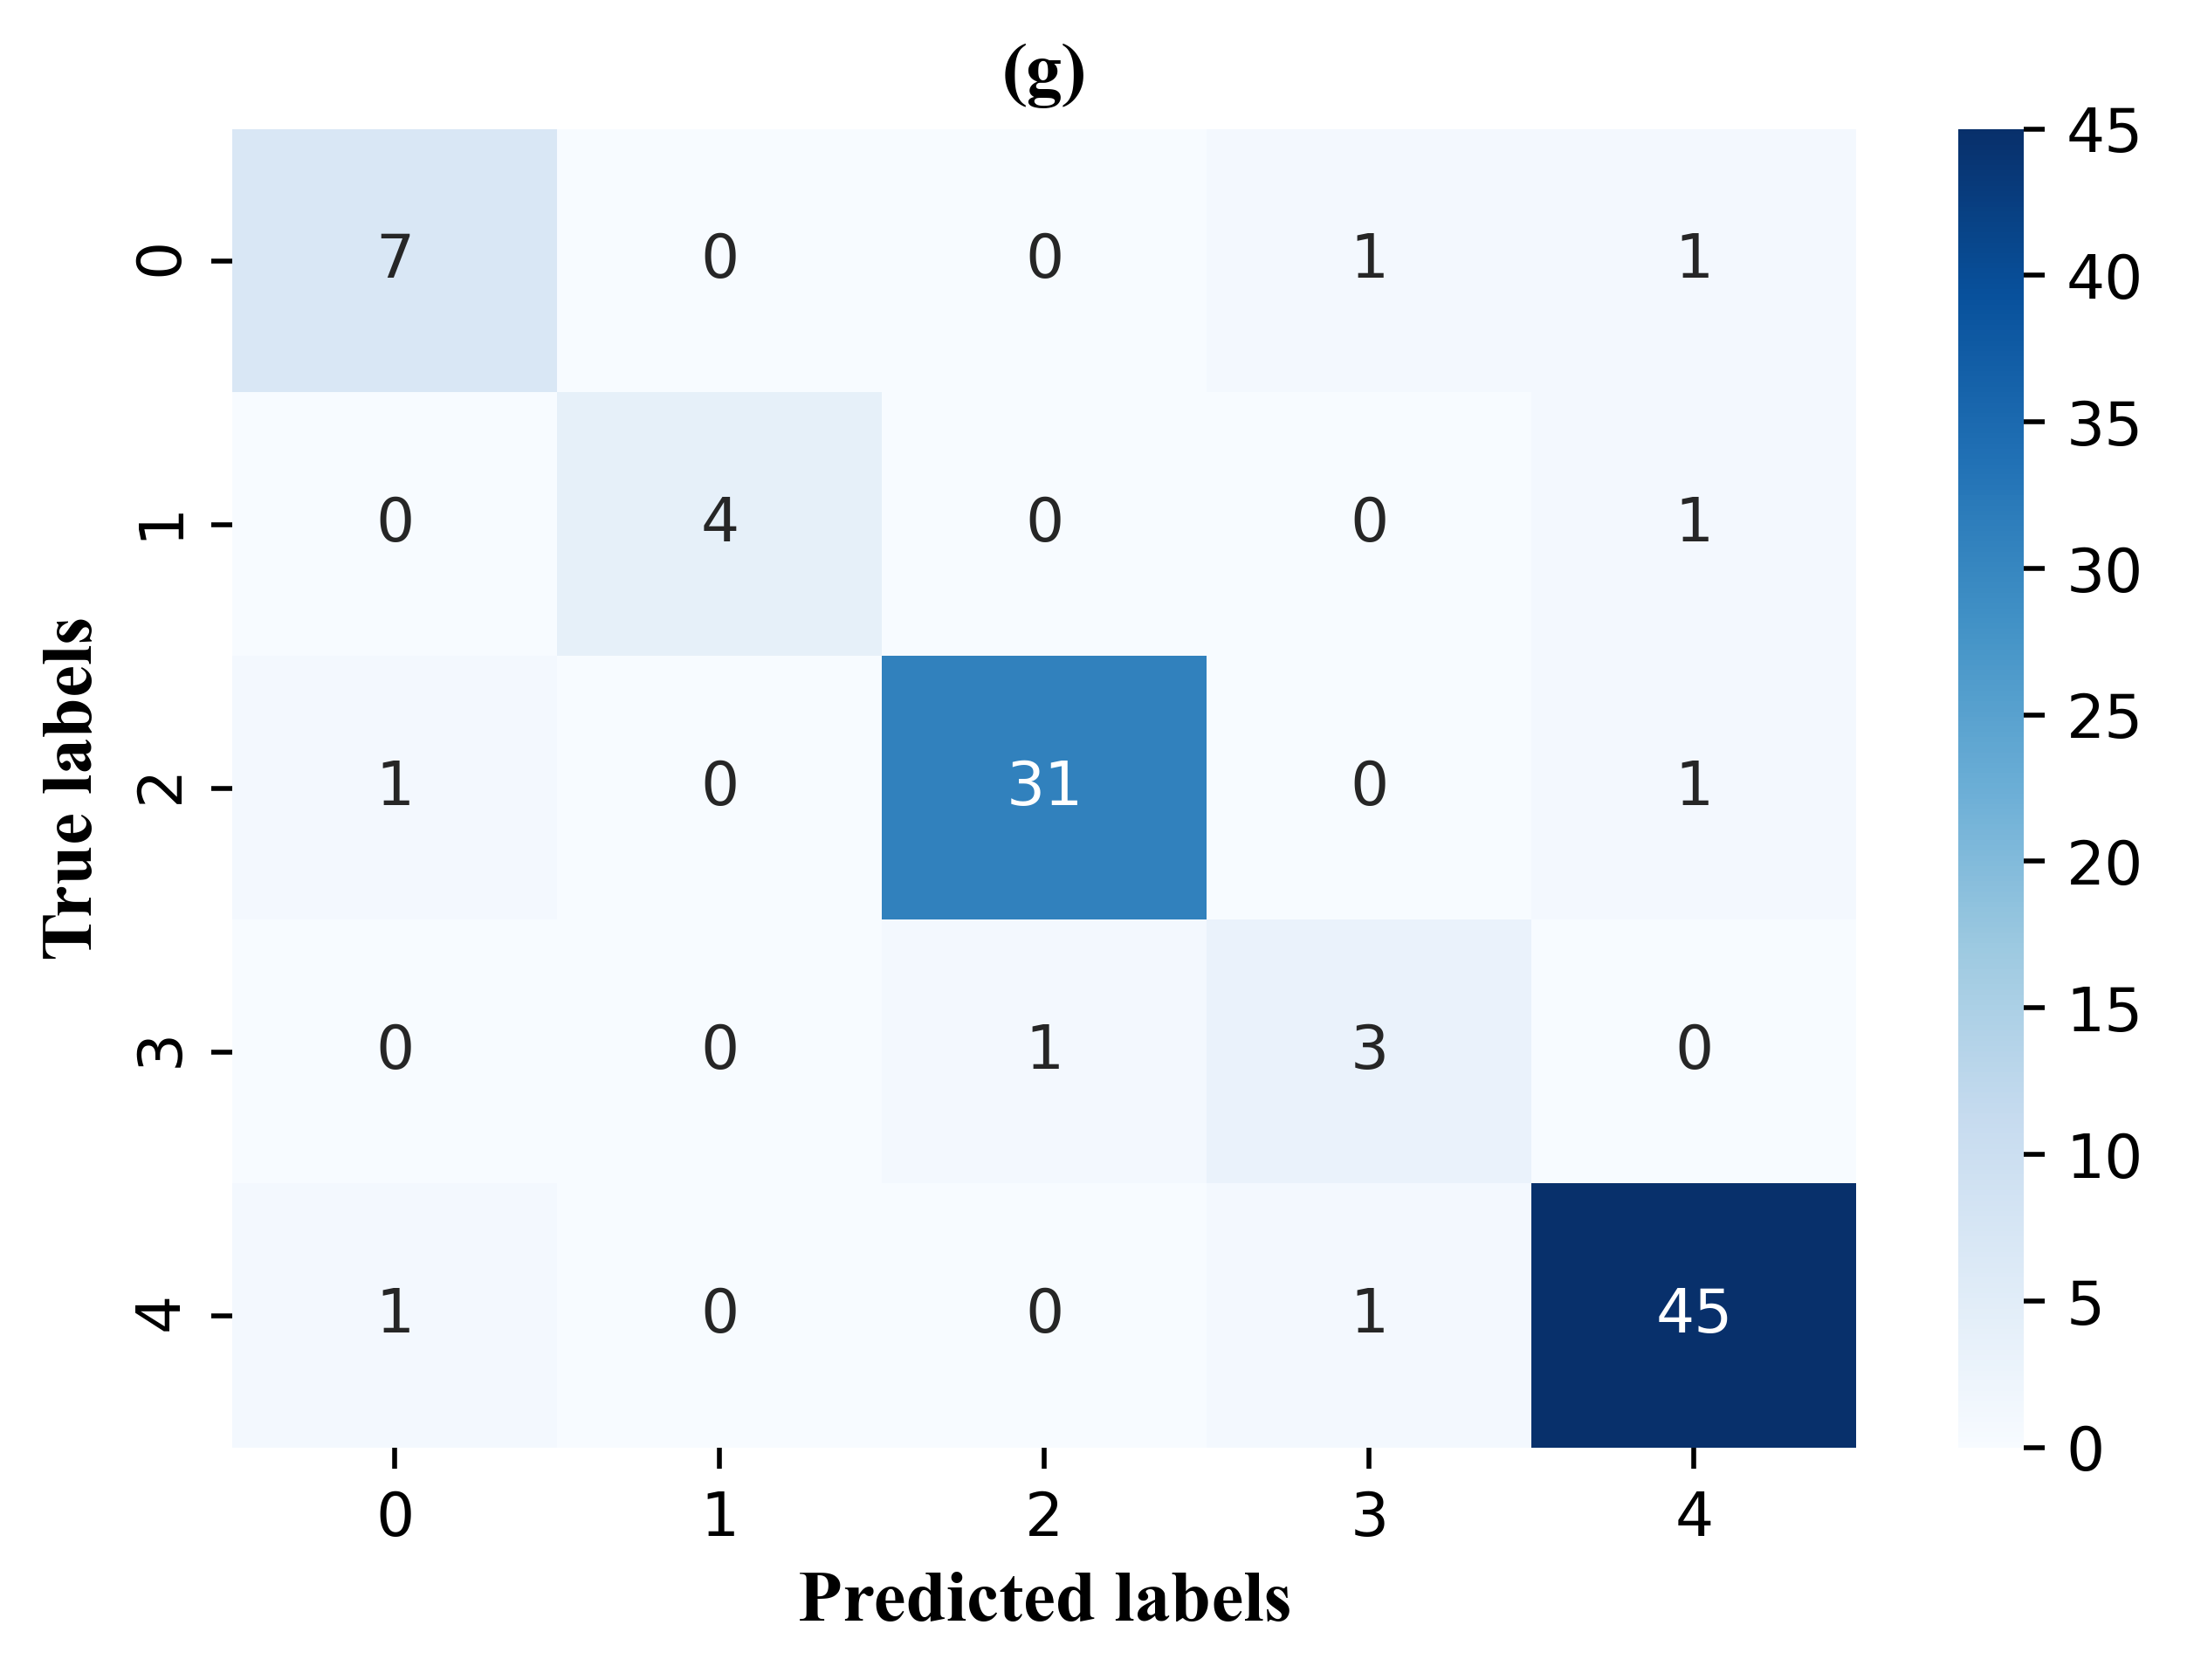



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.77777778 0.8        0.93939394 0.75       0.95744681]
recall_score_average_micro =  0.9183673469387755
recall_score_average_macro =  0.8449237051364712
recall_score_average_weighted =  0.9183673469387755


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.77777778 0.88888889 0.95384615 0.66666667 0.94736842]
f1_score_average_micro =  0.9183673469387755
f1_score_average_macro =  0.8469095816464238
f1_score_average_weighted =  0.9195341834439579


In [14]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre8,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(g)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre8,y_test, average=None)
recall_score_average_micro = recall_score(y_pre8,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre8,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre8,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre8,y_test, average=None)
f1_score_average_micro = f1_score(y_pre8,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre8,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre8,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)

# Xiao

In [15]:
    import math
    import scipy.stats
    list = []
    P = ['KNN', 'LR', 'RF', 'DT', 'SVM']
    len_sf = len(P) 
    a = np.zeros([5,5])
    for k in range(98):
        a=predict_proba[::, k]
        e=[]
        V = np.zeros(5)
        w= np.zeros(5)
       
        IV=[]
        for i in range(5):
            c=a[:,i]
            for j in range(5):
                if c[j] == 0:         # 判断变量是否为 python 
                    V[j] = 0           # 条件成立时设置标志为真
         
                else:
                   V[j]=c[j]*np.log2(c[j])
      
            w = np.sum(V)    
            IV0=np.exp(-w)
            e.append(IV0)
            IV=np.array(e)
        
   
        print('IV:',IV.shape)
        BJSS= np.zeros(len_sf) 
        #print(a)
        BJS = np.zeros([len_sf,len_sf])
        M=np.zeros([5,5])
        #predict_proba[predict_proba<0.0000000000001] = 1e-12
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print(BJS)
        for i in range(len_sf):
            BJSS[i]=sum(BJS[i,:])/4
        print('S:',BJSS)
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/BJSS[i]
        # 证据对自己的支持度为1
        print('sup:',sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
       
        #归一化
        IVV = np.zeros(len_sf)
        for i in range(len_sf):
            IVV[i]=float(IV[i])/sum(IV)
        Acrd = np.zeros(len_sf)
        Acrd = np.multiply(crd,IVV)
        #归一化
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A = np.zeros(5)
        for i in range(5):
            A[i] = sum(np.multiply(a[i,:],Acrdd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','D','E'] 
        mp, k = dempster(m1, m2, P)
        #print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        #print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        #print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        #print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        mp4, k = dempster(mp3, m2, P)
        print(f'融合后信度为{mp4}')
        print(f'冲突因子k = {k}')
        pre_dsjq=[]
        pre_grid = np.argmax(mp3)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre9=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre9)
print('accuracy: %.2f%%' % (100 * accuracy)) 

IV: (5,)
[[0.00000000e+00 1.08056849e-01 1.00021615e-01 1.08031546e-01
  3.71740432e-02]
 [1.08056849e-01 0.00000000e+00 9.76668002e-02 3.48564050e-05
  1.02797768e-01]
 [1.00021615e-01 9.76668002e-02 0.00000000e+00 9.80479026e-02
  2.56156860e-02]
 [1.08031546e-01 3.48564050e-05 9.80479026e-02 0.00000000e+00
  1.03134514e-01]
 [3.71740432e-02 1.02797768e-01 2.56156860e-02 1.03134514e-01
  0.00000000e+00]]
S: [0.08832101 0.07713907 0.080338   0.0773122  0.0671805 ]
sup: [11.32233389 12.96359965 12.44740956 12.93456839 14.88527112]
[0.01906137 0.84948725 0.09281862 0.02663234 0.01200042]
融合后信度为[[1.27638743e-10 9.99998297e-01 1.70164365e-06 9.49542689e-10
  7.94759748e-12]]
冲突因子k = 0.15052456032325637
[1] (1,)
IV: (5,)
[[0.         0.10714315 0.11649618 0.10803155 0.05215063]
 [0.10714315 0.         0.08291877 0.00023127 0.12411911]
 [0.11649618 0.08291877 0.         0.08490371 0.06527791]
 [0.10803155 0.00023127 0.08490371 0.         0.12607361]
 [0.05215063 0.12411911 0.06527791 0.1260

  9.99999982e-01]]
冲突因子k = 0.09841888875083107
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4] (56,)
IV: (5,)
[[0.         0.00028943 0.01244484 0.         0.08317037]
 [0.00028943 0.         0.01094637 0.00028943 0.08080342]
 [0.01244484 0.01094637 0.         0.01244484 0.04684683]
 [0.         0.00028943 0.01244484 0.         0.08317037]
 [0.08317037 0.08080342 0.04684683 0.08317037 0.        ]]
S: [0.02397616 0.02308216 0.02067072 0.02397616 0.07349775]
sup: [41.70809412 43.32350088 48.37760918 41.70809412 13.60585882]
[0.00941682 0.00252512 0.00798322 0.010926   0.96914884]
融合后信度为[[8.41557024e-13 3.12859462e-16 3.12409730e-13 2.05316896e-12
  1.00000000e+00]]
冲突因子k = 0.030851161377292845
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 4] (57,)
IV: (5,)
[[0.00000000e+00 9.47131139e-05 5.28634750e-02 0.00000000e+00
  1.63515068e-02]
 [9.47131139e-05 0.0

The confusion matrix result:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  1]
 [ 1  0 32  3  1]
 [ 0  0  0  1  0]
 [ 1  0  0  1 46]]


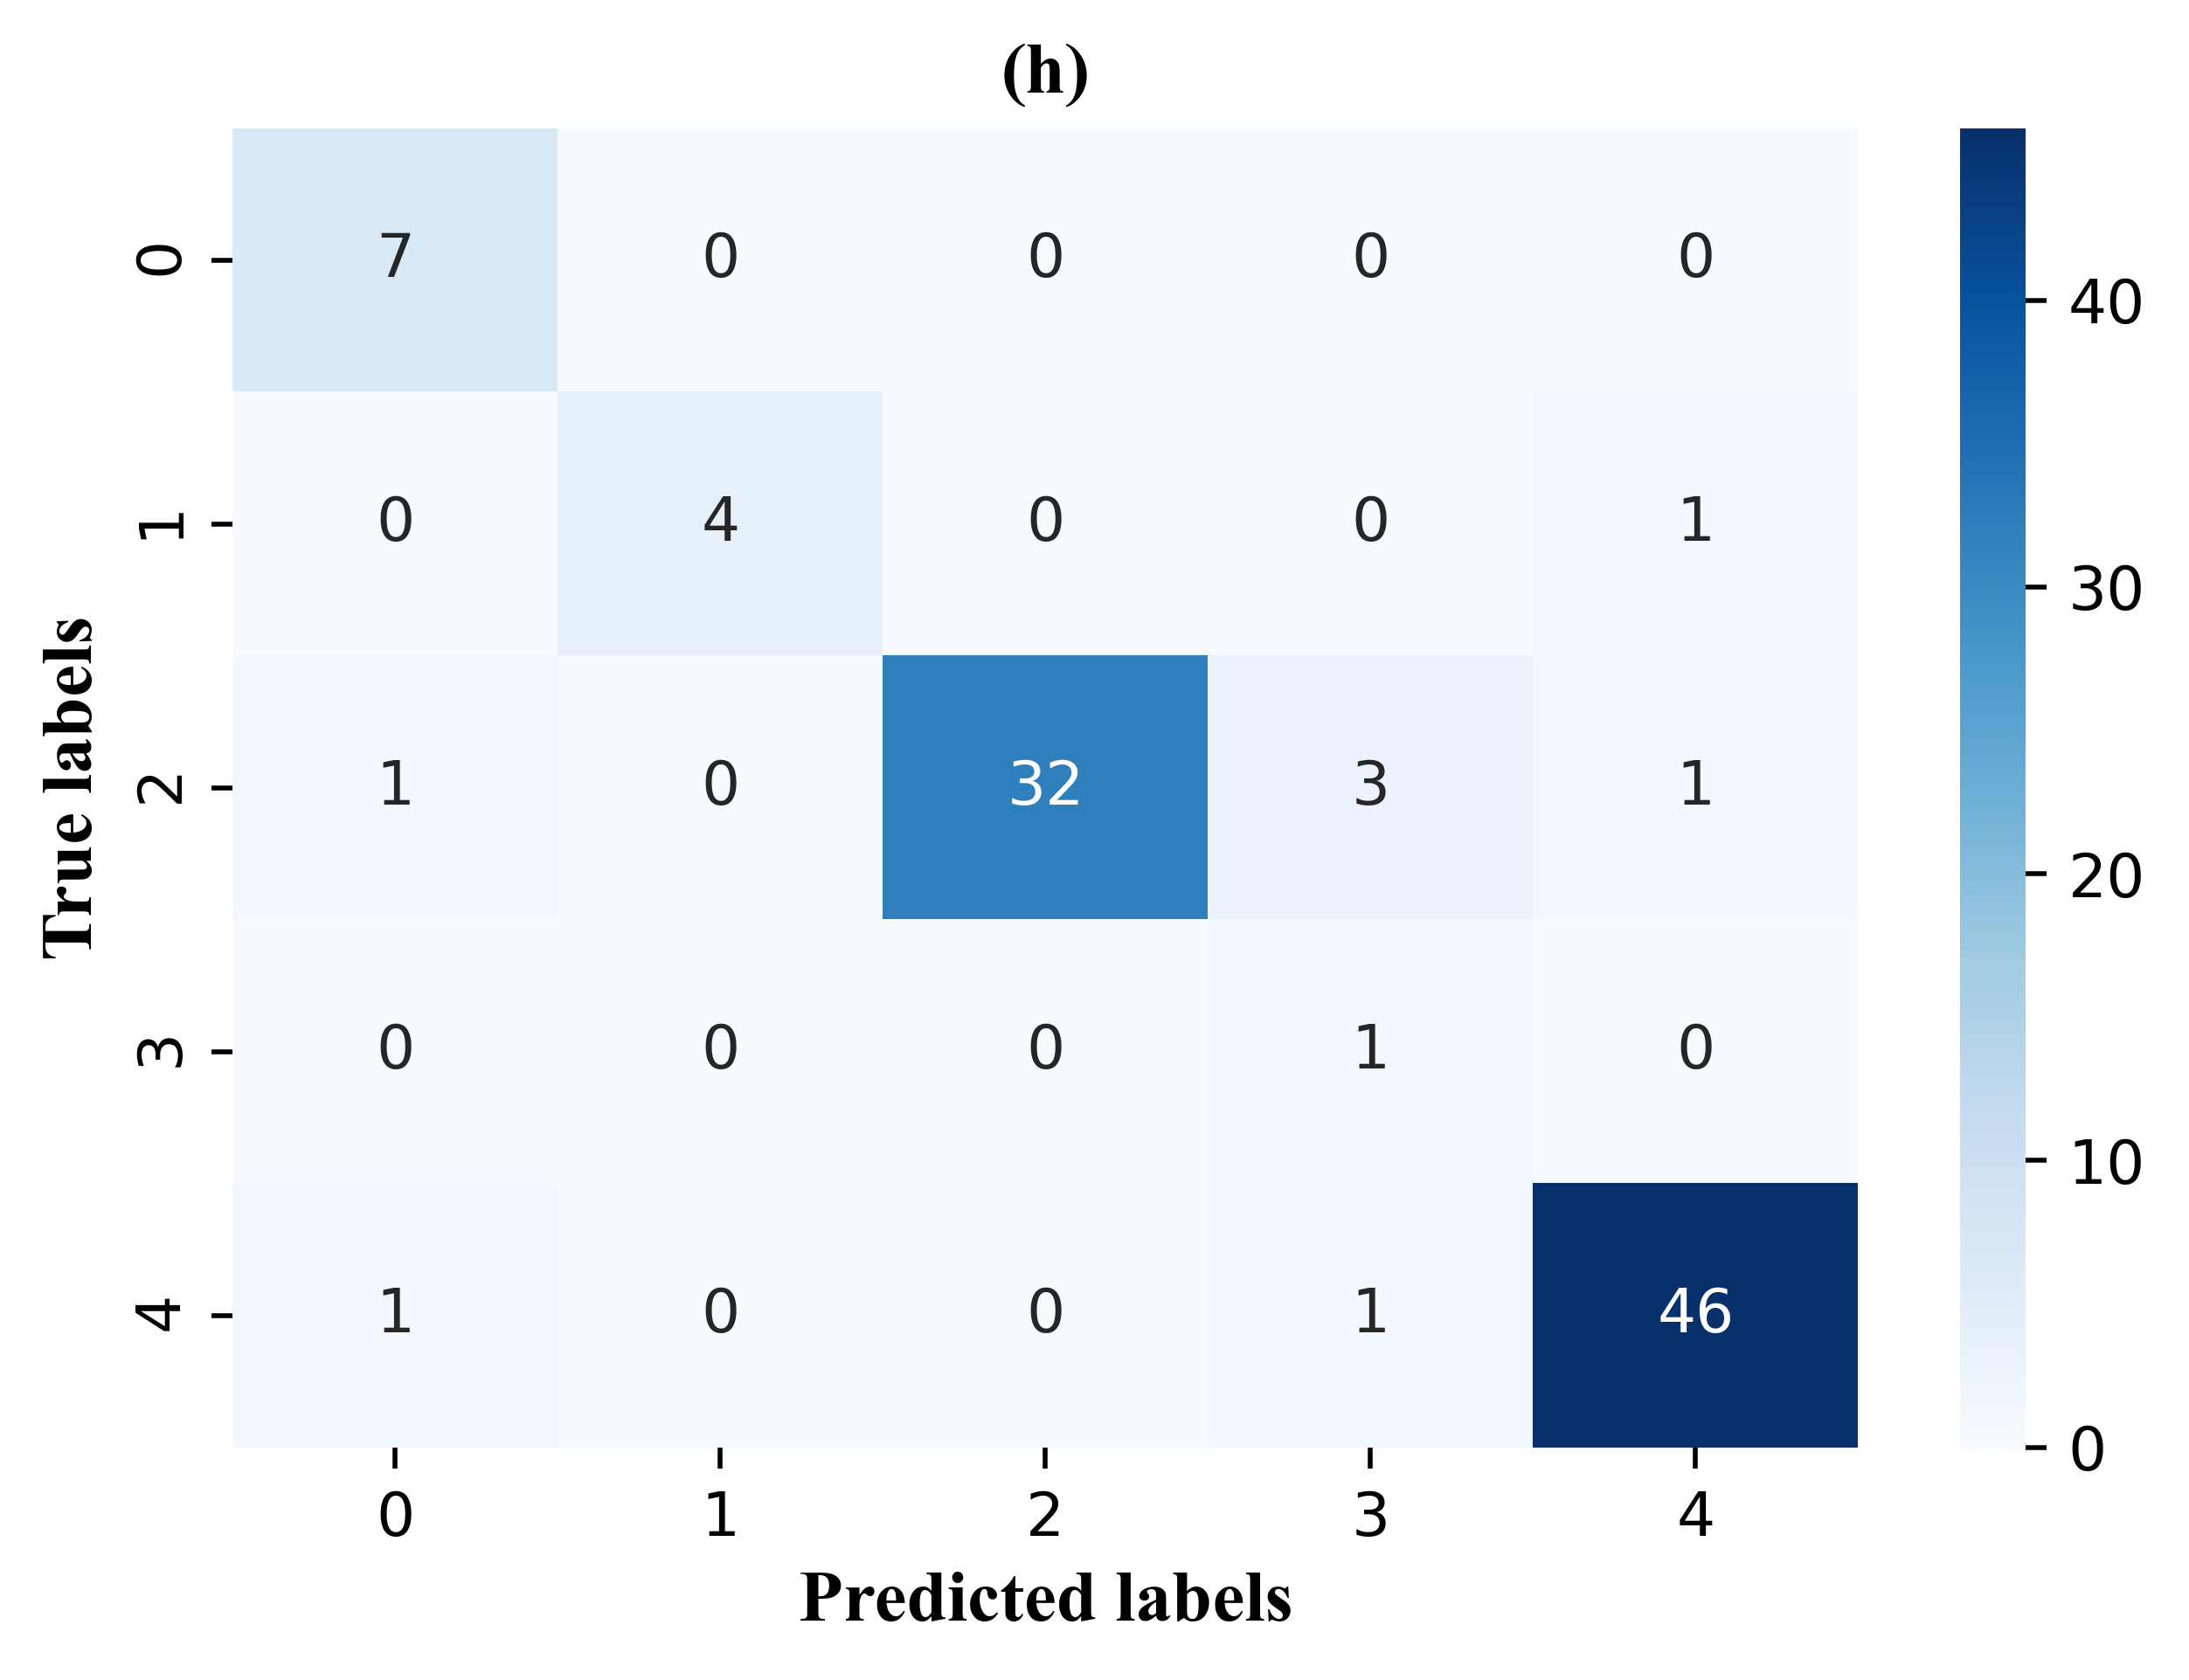



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [1.         0.8        0.86486486 1.         0.95833333]
recall_score_average_micro =  0.9183673469387755
recall_score_average_macro =  0.9246396396396396
recall_score_average_weighted =  0.9183673469387755


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.875      0.88888889 0.92753623 0.33333333 0.95833333]
f1_score_average_micro =  0.9183673469387755
f1_score_average_macro =  0.7966183574879228
f1_score_average_weighted =  0.9308328403825299


In [16]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre9,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(h)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre9,y_test, average=None)
recall_score_average_micro = recall_score(y_pre9,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre9,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre9,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre9,y_test, average=None)
f1_score_average_micro = f1_score(y_pre9,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre9,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre9,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


In [17]:
    list = []
    e=[] 
    b = ['GB', 'DT', 'SVM','BG1','BG2']
    len_sf = len(b) 
    d = np.zeros([len_sf,len_sf])
    a = np.zeros([5,5])
    for k in range(98):
        a=predict_proba[::, k] 
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                d[i,j]=1/np.sqrt(2)*np.linalg.norm(np.sqrt(p)-np.sqrt(q))
        print('D:',d)
        dd= np.zeros(len_sf) 
        for i in range(len_sf):
            dd[i]=sum((d[i,:])-d[i,i])/4
       
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/dd[i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1

        print('sup:',sup.shape)
        e=[]
        V = np.zeros(5)
        w= np.zeros(5)
       
        IV=[]
        for i in range(5):
            c=a[:,i]
            for j in range(5):
                if c[j] == 0:         # 判断变量是否为 python 
                    V[j] = 0           # 条件成立时设置标志为真
         
                else:
                   V[j]=c[j]*np.log2(c[j])
      
            w = np.sum(V)    
            IV0=np.exp(-w)
            e.append(IV0)
            IV=np.array(e)
        
   
        print('IV:',IV.shape)
        crd = np.zeros(len_sf)
        crd = np.multiply(sup,IV)
        #归一化
        Acrd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrd[i]=float(crd[i])/sum(crd)
        
        
        A = np.zeros(5)
        for i in range(5):
            A[i] = sum(np.multiply(a[i,:],Acrd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        
        
        
        AA = A
        print(AA)
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','D','E'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        #print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        #print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        #print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        
        pre_dsjq=[]
        pre_grid = np.argmax(mp3)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre7=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre7)
print('accuracy: %.2f%%' % (100 * accuracy)) 

D: [[0.         0.32452188 0.30068219 0.3249197  0.18828893]
 [0.32452188 0.         0.30532454 0.00590391 0.31446922]
 [0.30068219 0.30532454 0.         0.30985972 0.13501233]
 [0.3249197  0.00590391 0.30985972 0.         0.3176294 ]
 [0.18828893 0.31446922 0.13501233 0.3176294  0.        ]]
sup: (5,)
IV: (5,)
[0.01882915 0.85226189 0.09105821 0.025905   0.01194574]
融合后信度为[[4.81832141e-04 9.87143553e-01 1.12686641e-02 9.12013566e-04
  1.93936916e-04]]
冲突因子k = 0.264189763064286
[1] (1,)
D: [[0.         0.31565155 0.32110828 0.3249197  0.22520311]
 [0.31565155 0.         0.27509588 0.0152072  0.33849276]
 [0.32110828 0.27509588 0.         0.28873593 0.21938449]
 [0.3249197  0.0152072  0.28873593 0.         0.35036226]
 [0.22520311 0.33849276 0.21938449 0.35036226 0.        ]]
sup: (5,)
IV: (5,)
[0.01273808 0.02283408 0.84833396 0.08932501 0.02676887]
融合后信度为[[2.22561827e-04 7.15170928e-04 9.87135056e-01 1.09443252e-02
  9.82885644e-04]]
冲突因子k = 0.2709503020513709
[1 2] (2,)
D: [[0.      

[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1] (35,)
D: [[0.         0.01164574 0.14458178 0.         0.23269454]
 [0.01164574 0.         0.13574065 0.01164574 0.22230173]
 [0.14458178 0.13574065 0.         0.14458178 0.13662077]
 [0.         0.01164574 0.14458178 0.         0.23269454]
 [0.23269454 0.22230173 0.13662077 0.23269454 0.        ]]
sup: (5,)
IV: (5,)
[0.00276991 0.00283655 0.0097472  0.01258298 0.97206336]
融合后信度为[[8.11745231e-06 8.51269261e-06 1.00518654e-04 1.67515218e-04
  9.99715336e-01]]
冲突因子k = 0.054823761759660986
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4] (36,)
D: [[0.         0.00973196 0.16260627 0.         0.1309159 ]
 [0.00973196 0.         0.15433527 0.00973196 0.12204945]
 [0.16260627 0.15433527 0.         0.16260627 0.08729858]
 [0.         0.00973196 0.16260627 0.         0.1309159 ]
 [0.1309159  0.12204945 0.08729858 0.1309159  0.        ]]
sup: (5,)
IV: (5,)
[0.00502792 0.00306547 0.00167624 0.0052411

  9.99886361e-01]]
冲突因子k = 0.03228556277929782
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 4 4 4 2 4 4 2 4 4 2 4 0 3 1 4 2 4 0
 4] (75,)
D: [[0.         0.73994894 0.63886225 0.74349607 0.61212097]
 [0.73994894 0.         0.26210719 0.01147473 0.66809989]
 [0.63886225 0.26210719 0.         0.27294668 0.45236337]
 [0.74349607 0.01147473 0.27294668 0.         0.67784891]
 [0.61212097 0.66809989 0.45236337 0.67784891 0.        ]]
sup: (5,)
IV: (5,)
[0.19519257 0.02919308 0.19299176 0.06521128 0.51741131]
融合后信度为[[0.10943121 0.00244779 0.10697744 0.01221406 0.76892949]]
冲突因子k = 0.6518348270607086
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 4 4 4 2 4 4 2 4 4 2 4 0 3 1 4 2 4 0
 4 4] (76,)
D: [[0.         0.30254857 0.29954797 0.3249197  0.46453762]
 [0.30254857 0.         0.24305895 0.04305144 0.60905184]
 [0.29954797 0.24305895 0.         0.28442813 0.40

The confusion matrix result:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  1]
 [ 1  0 32  3  1]
 [ 0  0  0  1  0]
 [ 1  0  0  1 46]]


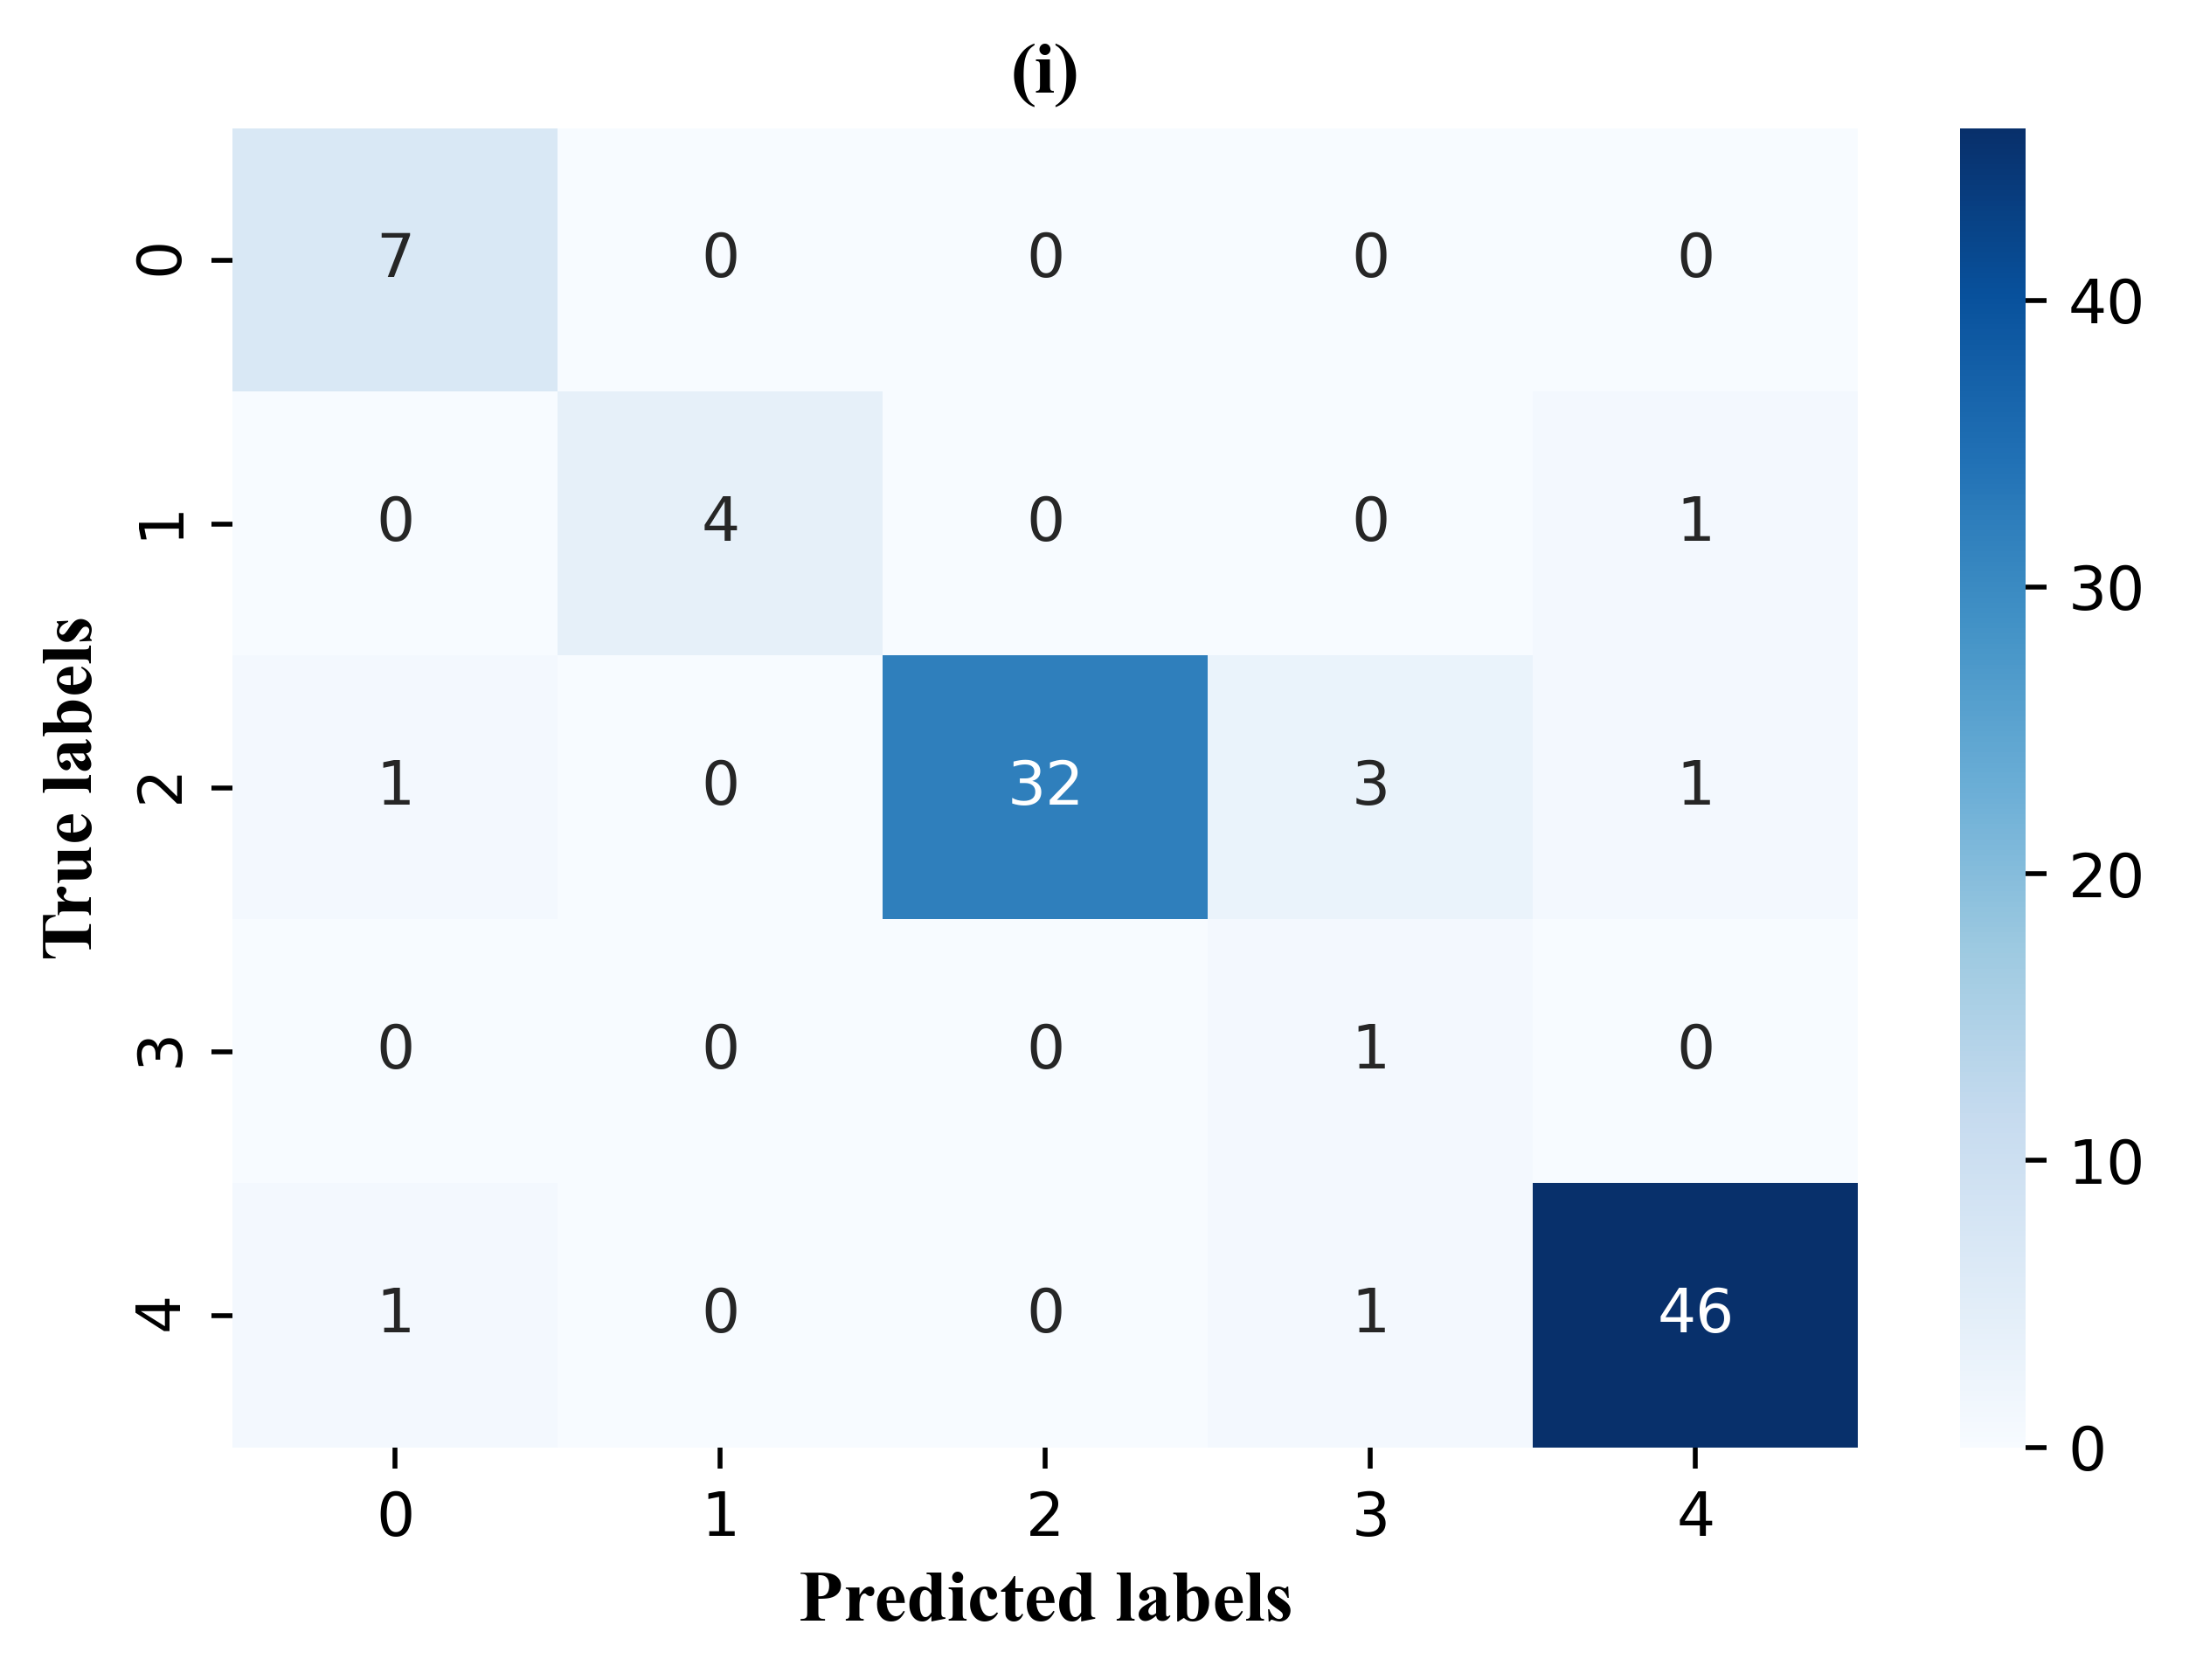



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [1.         0.8        0.86486486 1.         0.95833333]
recall_score_average_micro =  0.9183673469387755
recall_score_average_macro =  0.9246396396396396
recall_score_average_weighted =  0.9183673469387755


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.875      0.88888889 0.92753623 0.33333333 0.95833333]
f1_score_average_micro =  0.9183673469387755
f1_score_average_macro =  0.7966183574879228
f1_score_average_weighted =  0.9308328403825299


In [18]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre7,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(i)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre7,y_test, average=None)
recall_score_average_micro = recall_score(y_pre7,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre7,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre7,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre7,y_test, average=None)
f1_score_average_micro = f1_score(y_pre7,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre7,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre7,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


# Proposed method

In [19]:
    list = []
    b = ['KNN', 'GB','RF','DT', 'SVM']
    len_sf = len(b) 
    a = np.zeros([5,5])
    
    for k in range(98):
        a=predict_proba[::, k] 
        import scipy.stats
        d = np.zeros(len_sf)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.linalg.norm(np.sqrt(p)-np.sqrt(c))
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(1/d[i])/sum(1/d)
           # crd为证据的可信度
        
       
        
        #a[a<1e-13] = 1e-12
        BJS = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
    
        #print(BJS)
        BJSS= np.zeros(len_sf) 
        for i in range(len_sf):
            BJSS[i]=sum((BJS[i,:])-BJS[i,i])/4
        sup1 = np.zeros(len_sf)
        for i in range(len_sf):
            sup1[i]=1/BJSS[i]
        crd1 = np.zeros(len_sf)
        for i in range(len_sf):
            crd1[i]=float(sup1[i])/sum(sup1)
        
        Acrd = np.zeros(len_sf)
        
        Acrd = np.multiply(crd,crd1)
        print(Acrd)
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A=np.zeros(5)
        for j in range(5):
            A[j] = sum(np.multiply(a[j,:],Acrdd))
            # 加权平均证据WAE
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','D','E'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        
        pre_dsjq=[]
        pre_grid = np.argmax(mp3)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre1=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre1)
print('accuracy: %.2f%%' % (100 * accuracy))  

[0.03292363 0.0322358  0.04943244 0.03199447 0.05435727]
[0.01634346 0.87041955 0.08010643 0.02284732 0.01028323]
融合后信度为[[3.49188127e-04 9.90441245e-01 8.38892375e-03 6.82404542e-04
  1.38239036e-04]]
融合后信度为[[6.61448888e-06 9.99194795e-01 7.78872656e-04 1.80704909e-05
  1.64760512e-06]]
融合后信度为[[1.24288252e-07 9.99927648e-01 7.17337667e-05 4.74673471e-07
  1.94792637e-08]]
融合后信度为[[2.33385573e-09 9.99993383e-01 6.60223456e-06 1.24603461e-08
  2.30145282e-10]]
[1] (1,)
[0.03378405 0.03563786 0.04631419 0.03455213 0.04781174]
[0.01049389 0.01847033 0.8728351  0.07379307 0.02440762]
融合后信度为[[1.43325432e-04 4.44016963e-04 9.91549994e-01 7.08730823e-03
  7.75355610e-04]]
融合后信度为[[1.73674574e-06 9.47001567e-06 9.99363029e-01 6.03911550e-04
  2.18525818e-05]]
融合后信度为[[2.08927081e-08 2.00515220e-07 9.99948080e-01 5.10870541e-05
  6.11434704e-07]]
融合后信度为[[2.51200050e-10 4.24336587e-09 9.99995659e-01 4.31931499e-06
  1.70987321e-08]]
[1 2] (2,)
[0.02449313 0.0431609  0.05217168 0.03274805 0.04645246]

  9.99999936e-01]]
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 3 2 2 2 2 2 4 4] (56,)
[0.03912829 0.04129682 0.05163233 0.03912829 0.0190751 ]
[0.00746981 0.00191086 0.00541317 0.0077381  0.97746806]
融合后信度为[[5.83910520e-05 3.82107287e-06 3.06640872e-05 6.26608286e-05
  9.99844463e-01]]
融合后信度为[[4.46293225e-07 7.47100153e-09 1.69842318e-07 4.96129494e-07
  9.99998880e-01]]
融合后信度为[[3.41057578e-09 1.46051407e-11 9.40578805e-10 3.92760109e-09
  9.99999992e-01]]
融合后信度为[[2.60636139e-11 2.85517141e-14 5.20887565e-12 3.10927561e-11
  1.00000000e+00]]
[1 2 4 4 4 4 4 0 2 2 2 2 4 0 0 2 2 4 4 4 2 2 2 2 4 2 2 2 4 4 0 2 1 2 1 4 4
 4 4 4 4 2 4 2 4 4 4 4 3 2 2 2 2 2 4 4 4] (57,)
[0.0404884  0.04177642 0.0212881  0.0404884  0.05078877]
[0.00365024 0.00251401 0.00108633 0.01233715 0.98041227]
融合后信度为[[1.38594643e-05 6.57411805e-06 1.22751690e-06 1.58319438e-04
  9.99820019e-01]]
融合后信度为[[5.16102576e-08 1.68605838e-08 1.36037167e-09 1.99258896e-06
  9.99

The confusion matrix result:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  1]
 [ 1  0 32  1  1]
 [ 0  0  0  3  0]
 [ 1  0  0  1 46]]


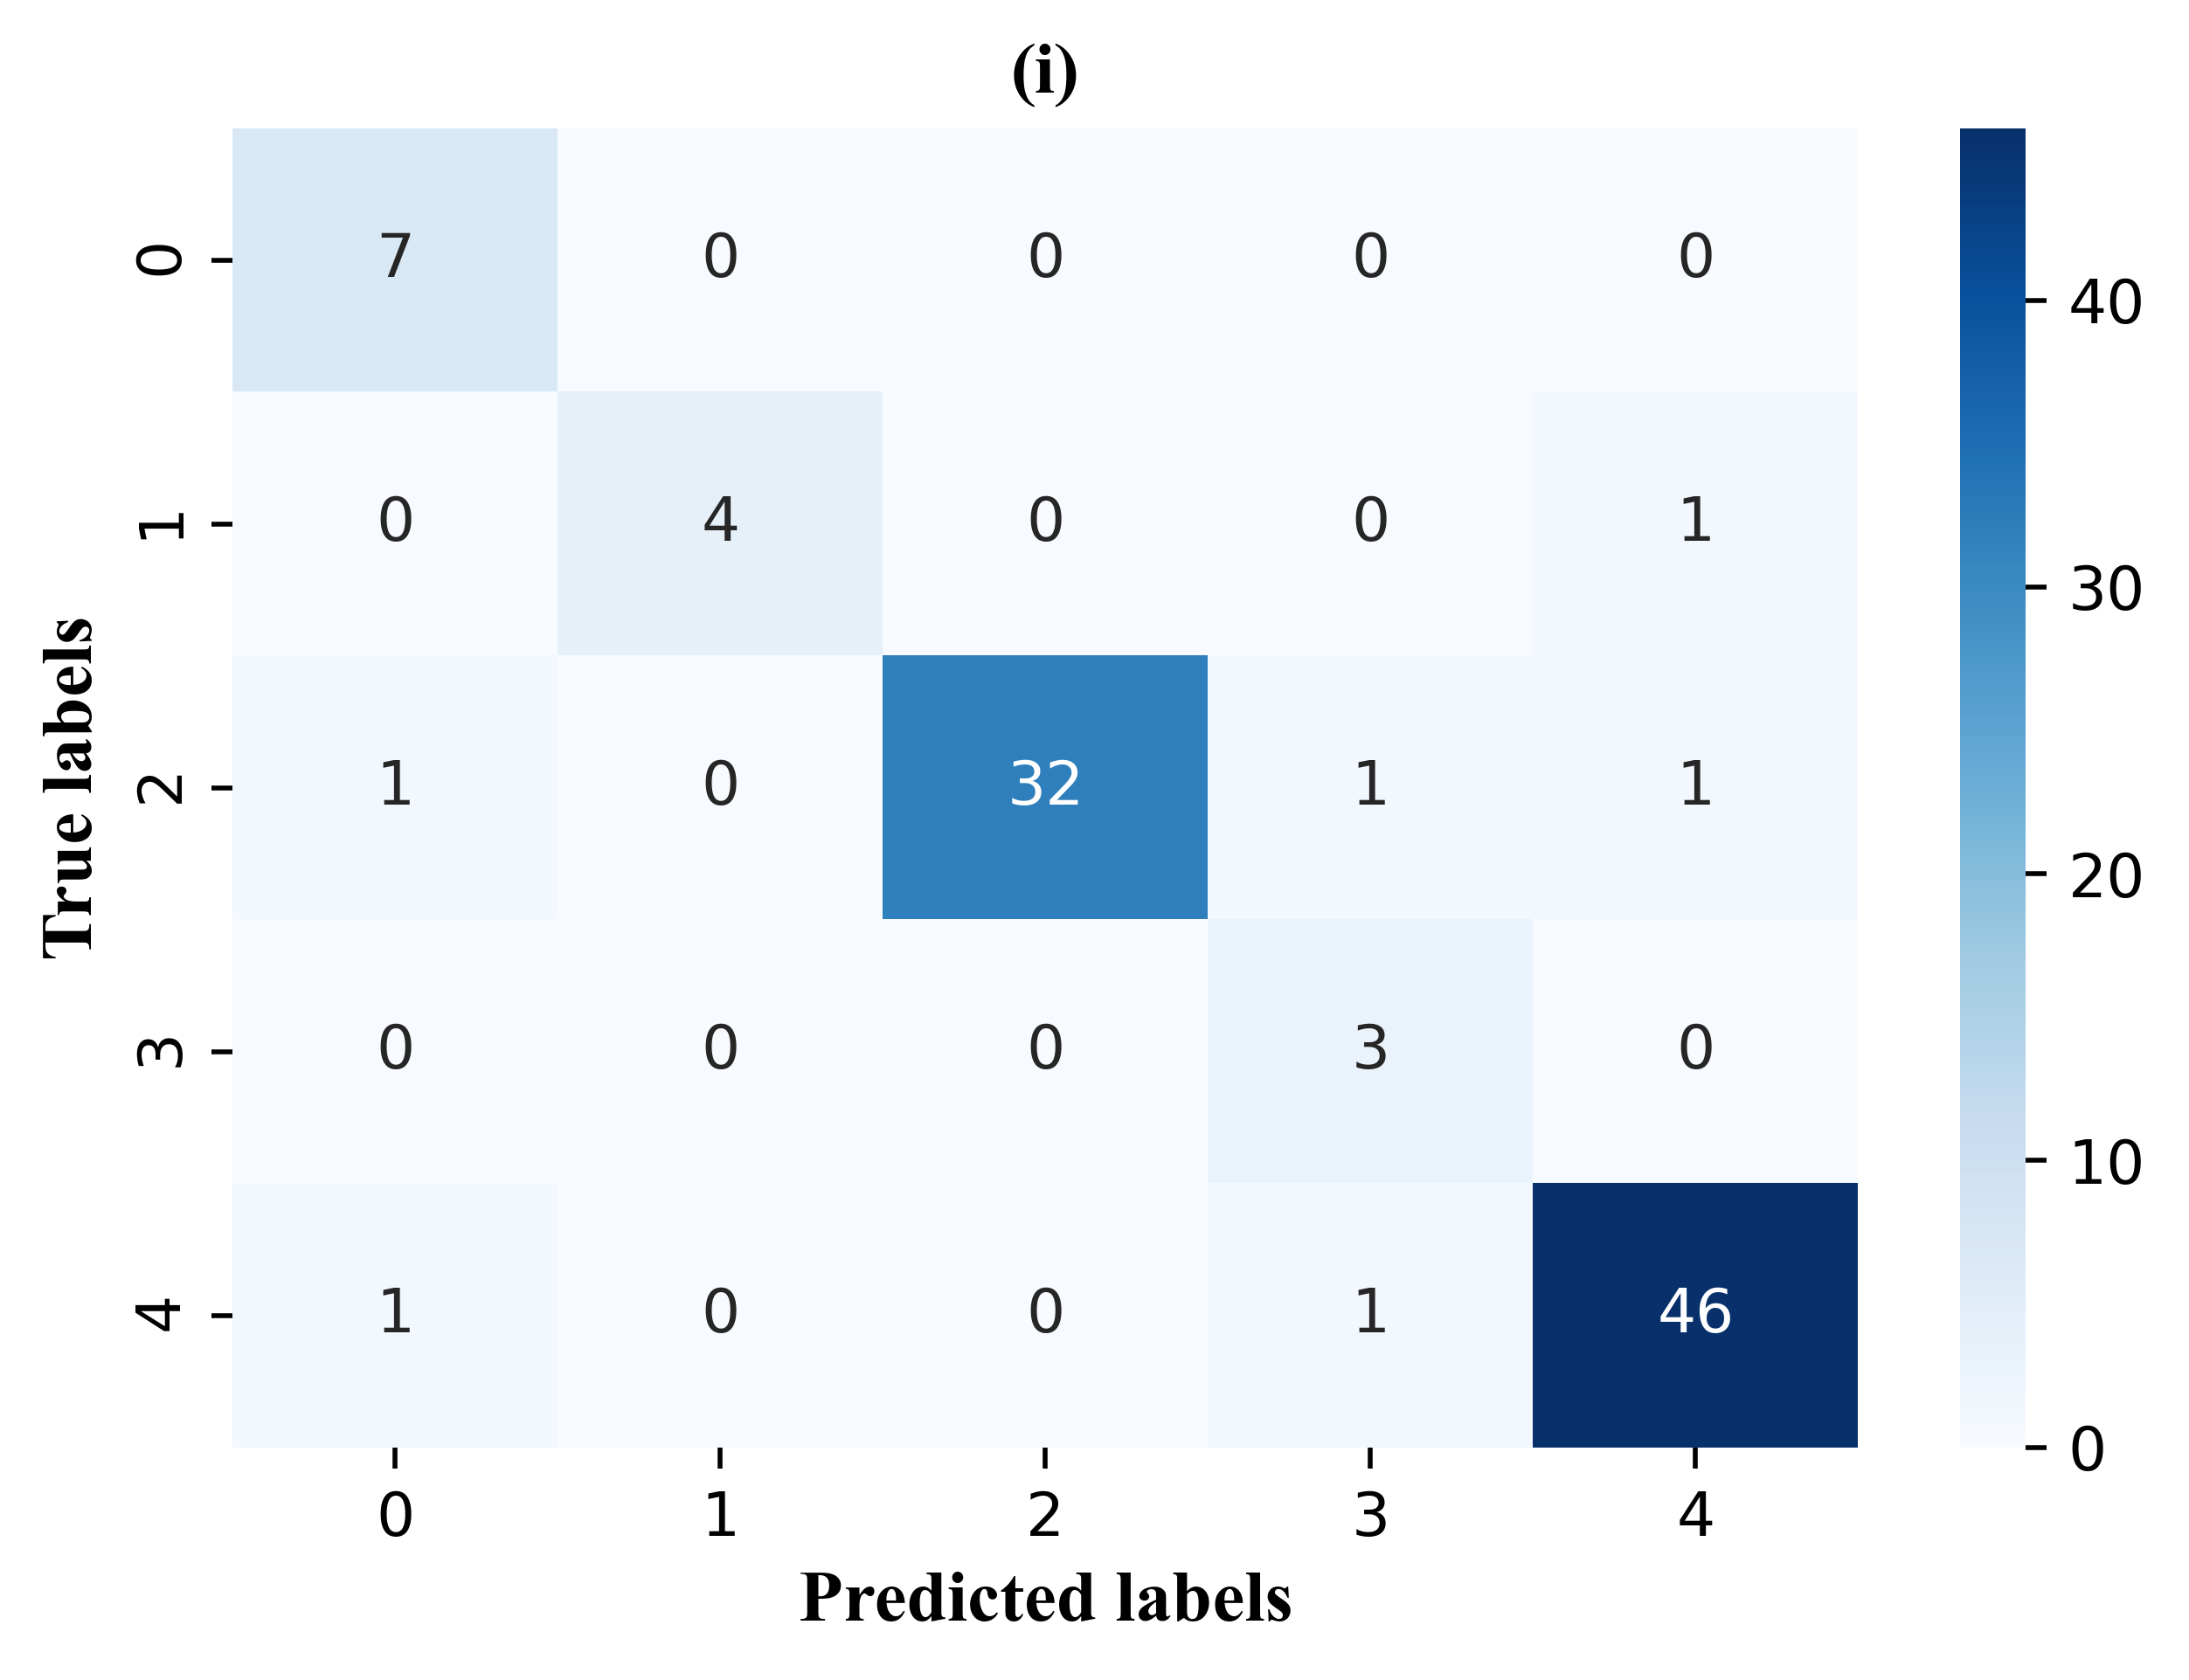



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [1.         0.8        0.91428571 1.         0.95833333]
recall_score_average_micro =  0.9387755102040817
recall_score_average_macro =  0.9345238095238095
recall_score_average_weighted =  0.9387755102040817
----------------------------- precision（精确率）-----------------------------
precision_score_average_None =  [0.77777778 1.         1.         0.6        0.95833333]
precision_score_average_micro =  0.9387755102040817
precision_score_average_macro =  0.8672222222222222
precision_score_average_weighted =  0.9514739229024943


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.875      0.88888889 0.95522388 0.75       0.95833333]
f1_score_average_micro =  0.9387755102040817
f1_score_average_macro =  0.8854892205638475
f1_score_average_weighted =  0.9413497986259182


In [20]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre1,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(i)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre1,y_test, average=None)
recall_score_average_micro = recall_score(y_pre1,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre1,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre1,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")
precision_score_average_None = precision_score(y_pre1,y_test, average=None)
precision_score_average_micro = precision_score(y_pre1,y_test, average='micro')
precision_score_average_macro = precision_score(y_pre1,y_test, average='macro')
precision_score_average_weighted = precision_score(y_pre1,y_test, average='weighted')
print('precision_score_average_None = ', precision_score_average_None)
print('precision_score_average_micro = ', precision_score_average_micro)
print('precision_score_average_macro = ', precision_score_average_macro)
print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre1,y_test, average=None)
f1_score_average_micro = f1_score(y_pre1,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre1,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre1,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


In [21]:
    list = []
    b = ['GB', 'DT', 'SVM','BG1','BG2']
    len_sf = len(b) 
    for k in range(98):
        a=predict_proba[::, k] 
        d=np.zeros(len_sf)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.sqrt(np.sum((p-c)**2))
        print(d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(d[i])/sum(d)
        print('Crd:',crd,crd.shape)
        w=np.zeros([5,5])
        w=a*crd
        for i in range(len_sf):
            A = w[:,i]
        #根据融合规则得到结果
        pre_ds=[]
        pre_dsjq=[]
        bel=np.zeros(5)
        for i in range(len_sf):
            init_ds = np.multiply(A,A)
            # 分子为与某事件有交集的事件概率之乘积
            # 分母K=∑(所有有交集的事件的概率乘积)
            # 或者为1-∑(所有不相交的时间概率乘积)
            # 对全部都是单事件而不是集体事件而言，有交集的事件即为事件其本身
            # K表示了证据的冲突程度，冲突越大，越接近0，一致性越大，越接近1
            bel[i]=init_ds[i]/sum(init_ds)
        print('init_ds:',init_ds,init_ds.shape)   
        print('bel:',bel,bel.shape)    
        pre_grid = np.argmax(init_ds)#返回最大值的位置
        #print(pre_grid)
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre10=y_pre.tolist()
#print(type(y_pre1),y_pre)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre10)
print('accuracy: %.2f%%' % (100 * accuracy))
#print(classification_report(y_test,y_pre1))
        
    

[0.69282032 0.89434925 0.69017503 0.89442719 0.68696115]
Crd: [0.17954607 0.23177278 0.17886053 0.23179298 0.17802765] (5,)
init_ds: [8.94133912e-06 2.07123434e-02 5.23927808e-04 4.88329947e-05
 1.54274868e-06] (5,)
bel: [4.19868143e-04 9.72611938e-01 2.46026454e-02 2.29310381e-03
 7.24445204e-05] (5,)
[1] (1,)
[0.69282032 0.89391015 0.71863652 0.89442719 0.64403183]
Crd: [0.18024237 0.23255739 0.18695865 0.2326919  0.16754968] (5,)
init_ds: [2.22548452e-05 9.26472635e-05 1.66254484e-02 5.15799391e-04
 2.42084898e-06] (5,)
bel: [1.28949526e-03 5.36818864e-03 9.63315482e-01 2.98865647e-02
 1.40269378e-04] (5,)
[1 2] (2,)
[0.69282032 0.88233298 0.79033787 0.89442719 0.68602864]
Crd: [0.17557771 0.22360487 0.20029105 0.22666984 0.17385653] (5,)
init_ds: [2.21801508e-04 5.87438431e-06 1.99754350e-05 1.20901211e-04
 1.99021314e-02] (5,)
bel: [1.09419845e-02 2.89797046e-04 9.85434683e-04 5.96433802e-03
 9.81818446e-01] (5,)
[1 2 4] (3,)
[0.89442719 0.89306455 0.87263064 0.89442719 0.80218085

The confusion matrix result:
 [[ 0  0  0  0  2]
 [ 0  3  0  0  2]
 [ 0  1 28  2  4]
 [ 0  0  0  0  0]
 [ 9  0  4  3 40]]


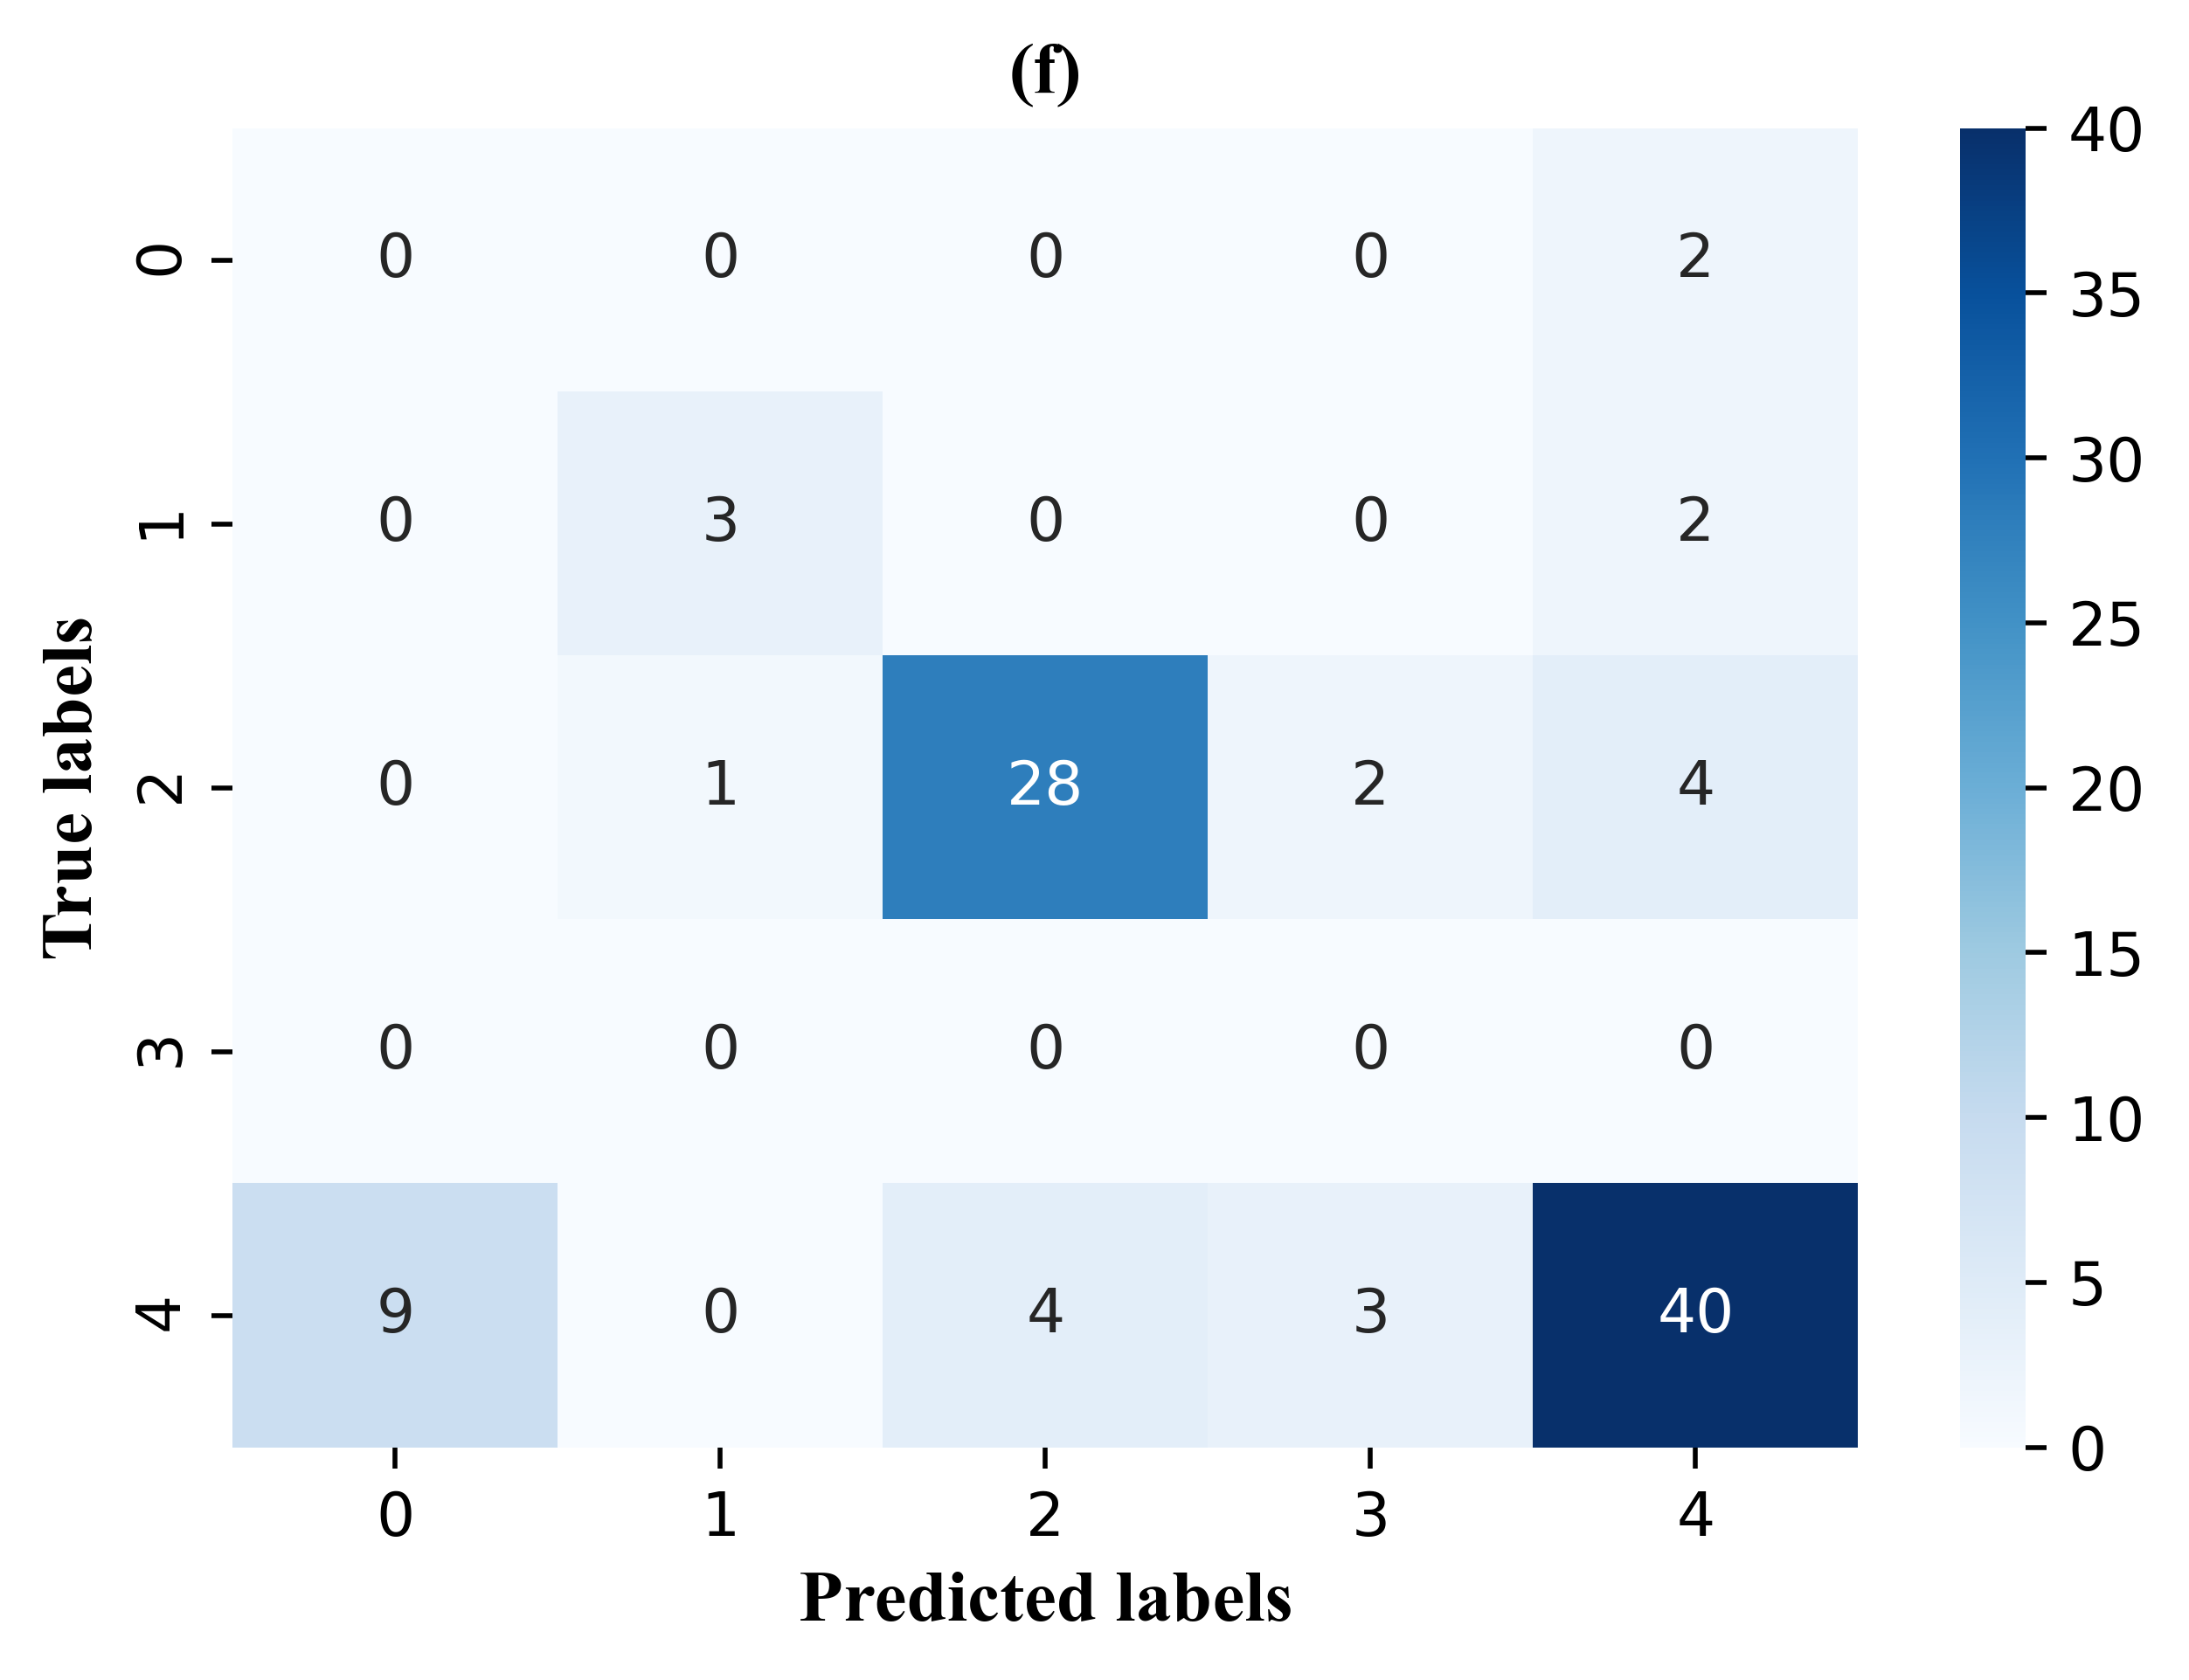



----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.         0.6        0.8        0.         0.71428571]
recall_score_average_micro =  0.7244897959183674
recall_score_average_macro =  0.4228571428571429
recall_score_average_weighted =  0.7244897959183674


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.         0.66666667 0.8358209  0.         0.76923077]
f1_score_average_micro =  0.7244897959183674
f1_score_average_macro =  0.4543436662839648
f1_score_average_weighted =  0.7720815076891837


In [22]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_pre10,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
#plt.figure()
# 利用热力图对于结果进行可视化
plt.figure(dpi=500)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.title('(f)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.xlabel('Predicted labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('True labels',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(y_pre10,y_test, average=None)
recall_score_average_micro = recall_score(y_pre10,y_test, average='micro')
recall_score_average_macro = recall_score(y_pre10,y_test, average='macro')
recall_score_average_weighted = recall_score(y_pre10,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(y_pre10,y_test, average=None)
f1_score_average_micro = f1_score(y_pre10,y_test, average='micro')
f1_score_average_macro = f1_score(y_pre10,y_test, average='macro')
f1_score_average_weighted = f1_score(y_pre10,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)


In [5]:
plt.figure(dpi=1500,figsize=(14,6))
x1=['KNN','GB ','RF','DT','SVM ','Standard deviation','Deng et al.','Xiao','Zhu et al.','Proposed method']
y=[82.65,89.80,88.78,84.69,68.37,72.45,91.84,91.84,91.84, 93.88]


color=['mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue']


plt.bar(x1, y,color=color,width = 0.7)
plt.ylim(40,100)
plt.ylabel('Accuracy(%)',fontproperties="Times New Roman",fontsize=12,fontweight='bold')  
#plt.xticks()

plt.xticks(x1, labels=x1,rotation=20)


for a,b in zip(x1,y):   #柱子上的数字显示
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=12,fontweight='bold',fontproperties="Times New Roman");

plt.savefig("Fig.5.eps")
plt.show()